Desenvolva um produto prático utilizando uma das ferramentas ou métodos apresentados na disciplina (ex: Zotero, Omeka, Tropy, StoryMap, OCR, NLP, GitHub, IA generativa, etc). O trabalho deve incluir: �. Produto final – site, visualização, protótipo, script, exposição virtual, base de dados, relatório ou outro formato digital. �. Relatório metodológico (2–3 páginas) explicando: ◦ Objetivo e contexto do trabalho; ◦ Ferramentas e métodos utilizados; ◦ Fontes e dados empregados; ◦ Dificuldades e soluções encontradas; ◦ Reflexão crítica sobre o processo. Critérios de Avaliação

Trabalho apresentado pela aluna Laís Menezes de Souza Silva para obtenção parcial de nota na disciplina Introdução à História Digital, do Programa de Pós-Graduação Interdisciplinar em Humanidades Digitais do Instituto Multidisciplinar da Universidade Federal Rural do Rio de Janeiro, ministrada pelo Prof. Dr. Eric Brasil. Data: 15/11/2025

Relatório metodológico

1. Instalação de Bibliotecas

Explicação: Esta célula prepara o ambiente instalando todas as ferramentas externas necessárias que não vêm pré-instaladas no Google Colab.

ebooklib: Para manipular e ler arquivos de livros digitais (.epub).


beautifulsoup4: Para limpar a formatação HTML de dentro do livro e extrair apenas o texto puro.


transformers: Biblioteca de Inteligência Artificial (Hugging Face) para usar modelos pré-treinados de análise de sentimento.


pyvis e networkx: Para criar e visualizar os grafos de redes de personagens.


spacy: Para processamento avançado de linguagem natural (NLP).

In [25]:
# Instalação das bibliotecas necessárias listadas no projeto
!pip install ebooklib beautifulsoup4 pandas transformers torch matplotlib seaborn nltk networkx pyvis spacy
!python -m spacy download pt_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.8.0/pt_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


2. Conversão de EPUB para TXT

Explicação: Realizei o upload do arquivo do livro (.epub). Ele abre o livro digital e percorre cada capítulo/documento interno. Usa o BeautifulSoup para remover tags HTML (como <b>, <p>, <div>), deixando apenas o texto legível.
Salva todo esse conteúdo limpo em um novo arquivo de texto (.txt) para facilitar as análises seguintes.

In [5]:
from ebooklib import epub
from bs4 import BeautifulSoup
import os
nome_do_arquivo = "Klara e o Sol.epub"  # <--- Coloque o nome do seu arquivo aqui
# Verificação simples para não dar erro depois
if os.path.exists(nome_do_arquivo):
    print(f"Arquivo '{nome_do_arquivo}' encontrado! Prosseguindo...")
    # Aqui continuaria o código de leitura do epub...
    # book = epub.read_epub(nome_do_arquivo)
else:
    print(f"Erro: O arquivo 'nome_do_arquivo' não foi encontrado nesta pasta.")

Arquivo 'Klara e o Sol.epub' encontrado! Prosseguindo...


In [26]:
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
import os

# Configuração do nome do arquivo
epub_filename = "Klara e o Sol.epub" # <--- CERTIFIQUE-SE QUE O NOME ESTÁ IGUAL AO SEU ARQUIVO
txt_filename = "Klara_Texto_Completo.txt"

def epub_to_txt(epub_path, txt_path):
    try:
        book = epub.read_epub(epub_path)
        full_text = ""
        print("Lendo arquivo EPUB...")
        
        for item in book.get_items_of_type(ebooklib.ITEM_DOCUMENT):
            content = item.get_body_content()
            soup = BeautifulSoup(content, 'html.parser')
            # Extrai texto e limpa tags HTML
            text_only = soup.get_text(separator=' ', strip=True)
            full_text += text_only + "\n\n"
            
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write(full_text)
        
        print(f"Sucesso! Arquivo convertido salvo como: {txt_path}")
        return full_text
        
    except FileNotFoundError:
        print(f"ERRO: O arquivo '{epub_path}' não foi encontrado na pasta.")
        return None

# Executa a conversão
book_text = epub_to_txt(epub_filename, txt_filename)

# Se já tiver o TXT e quiser apenas ler:
# with open(txt_filename, 'r', encoding='utf-8') as f:
#     book_text = f.read()

Lendo arquivo EPUB...
Sucesso! Arquivo convertido salvo como: Klara_Texto_Completo.txt


Carregando modelo de IA...


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

C:\Users\laism\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\laism\.cache\huggingface\hub\models--finiteautomata--beto-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular 

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Texto dividido em 1155 pedaços.
Analisando sentimentos...


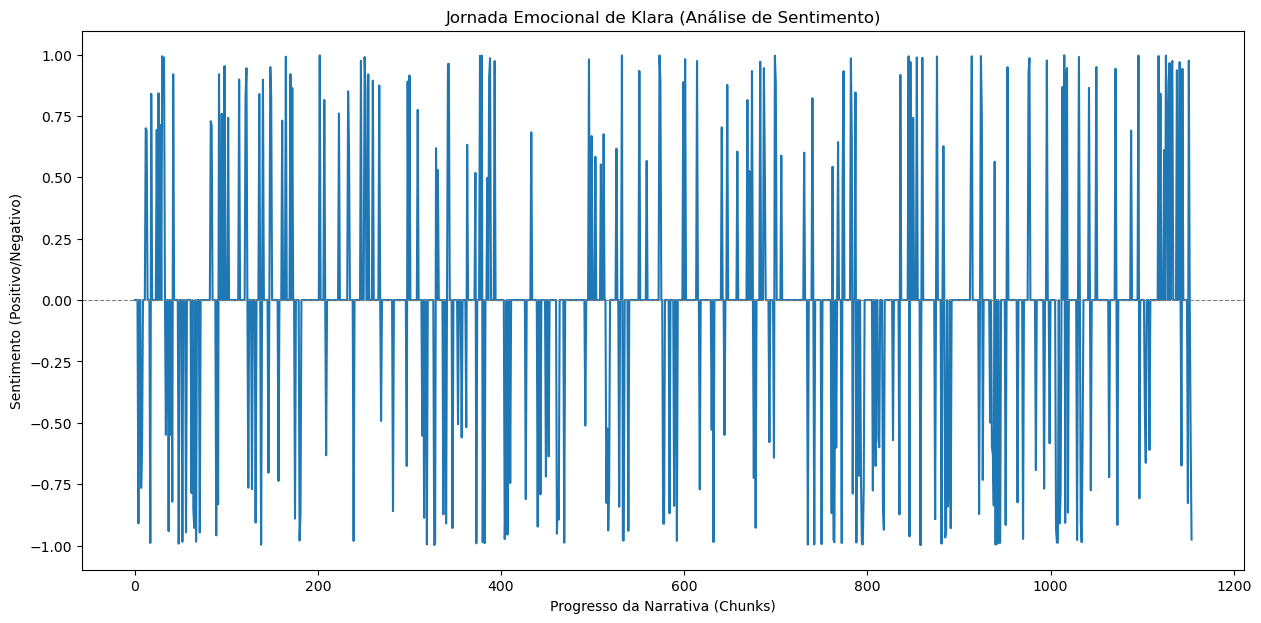

In [27]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar Pipeline de Sentimento (Modelo em Português)
print("Carregando modelo de IA...")
sentiment_pipeline = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

# 2. Dividir o texto em pedaços (Chunks) de 512 caracteres
# Modelos BERT têm limite de tamanho de entrada.
def split_text_into_chunks(text, chunk_size=512, overlap=50):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        # Ajuste para não cortar palavras (lógica simplificada)
        if end >= len(text):
            chunks.append(text[start:])
            break
        chunks.append(text[start:end])
        start += chunk_size - overlap 
    return chunks

if book_text:
    text_chunks = split_text_into_chunks(book_text)
    print(f"Texto dividido em {len(text_chunks)} pedaços.")

    # 3. Executar Análise (Pode demorar um pouco dependendo do PC)
    print("Analisando sentimentos...")
    results = sentiment_pipeline(text_chunks)
    
    # 4. Criar DataFrame
    df_sentiment = pd.DataFrame(results)
    df_sentiment['chunk_index'] = df_sentiment.index
    
    # Converter rótulos em valores numéricos para o gráfico
    def get_score(row):
        if row['label'] == 'POS': return row['score']
        if row['label'] == 'NEG': return -row['score']
        return 0
    
    df_sentiment['sentiment_value'] = df_sentiment.apply(get_score, axis=1)

    # 5. Visualizar
    plt.figure(figsize=(15, 7))
    sns.lineplot(x='chunk_index', y='sentiment_value', data=df_sentiment)
    plt.title('Jornada Emocional de Klara (Análise de Sentimento)')
    plt.xlabel('Progresso da Narrativa (Chunks)')
    plt.ylabel('Sentimento (Positivo/Negativo)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.show()

In [29]:
import spacy

# 1. Carregar Spacy
nlp = spacy.load('pt_core_news_sm')
# Aumentar limite de tamanho do Spacy se o livro for grande
nlp.max_length = 2000000 

# 2. Definir Léxico
emotional_lexicon = ['alegria', 'tristeza', 'medo', 'esperança', 'raiva', 'paz', 'amor', 'culpa', 'ciúmes', 'gratidão']
klara_refs = ['klara', 'ela', 'eu', 'minha'] # "Eu" assumindo narração em 1ª pessoa

# 3. Filtrar Sentenças
print("Processando texto com Spacy (isso pode demorar)...")
# Processamos apenas os primeiros 100.000 caracteres para teste rápido. 
# Remova [:100000] para o livro todo.
doc = nlp(book_text[:100000]) 

relevant_sentences = []

for sent in doc.sents:
    text_lower = sent.text.lower()
    
    # Verifica se Klara é mencionada (ou é o sujeito implícito na narração)
    has_klara = any(ref in text_lower for ref in klara_refs)
    
    # Verifica termo emocional
    has_emotion = any(term in text_lower for term in emotional_lexicon)
    
    if has_klara and has_emotion:
        relevant_sentences.append(sent.text.strip())

print(f"\nEncontradas {len(relevant_sentences)} frases emocionais ligadas a Klara.")
for s in relevant_sentences[:5]:
    print(f"- {s}")

Processando texto com Spacy (isso pode demorar)...

Encontradas 16 frases emocionais ligadas a Klara.
- Embora eu ainda fosse nova, na mesma hora me ocorreu que talvez não tivesse sido culpa minha, que talvez o Sol tivesse retirado seu desenho por acaso no exato momento em que o toquei.
- De vez em quando — eu logo ganhei experiência em observar as pessoas diante da vitrine enquanto dava a impressão de estar olhando para o Edifício rpo —, uma criança se aproximava para nos ver e havia nela uma tristeza, ou às vezes uma raiva, como se tivéssemos feito alguma coisa de errado.
- Ela continuou me encarando por vários segundos, e tive medo de que seus adultos saíssem do carro antes que ela pudesse falar mais alguma coisa.
- ” Ela me encarou em silêncio por mais um momento, e pensei ter visto outro pequeno sinal de tristeza, mas eu ainda era muito nova e não tinha certeza.
- Até me deparar com aquela dupla, nunca havia me ocorrido que um aa pudesse viver com uma criança que o desprezasse e n

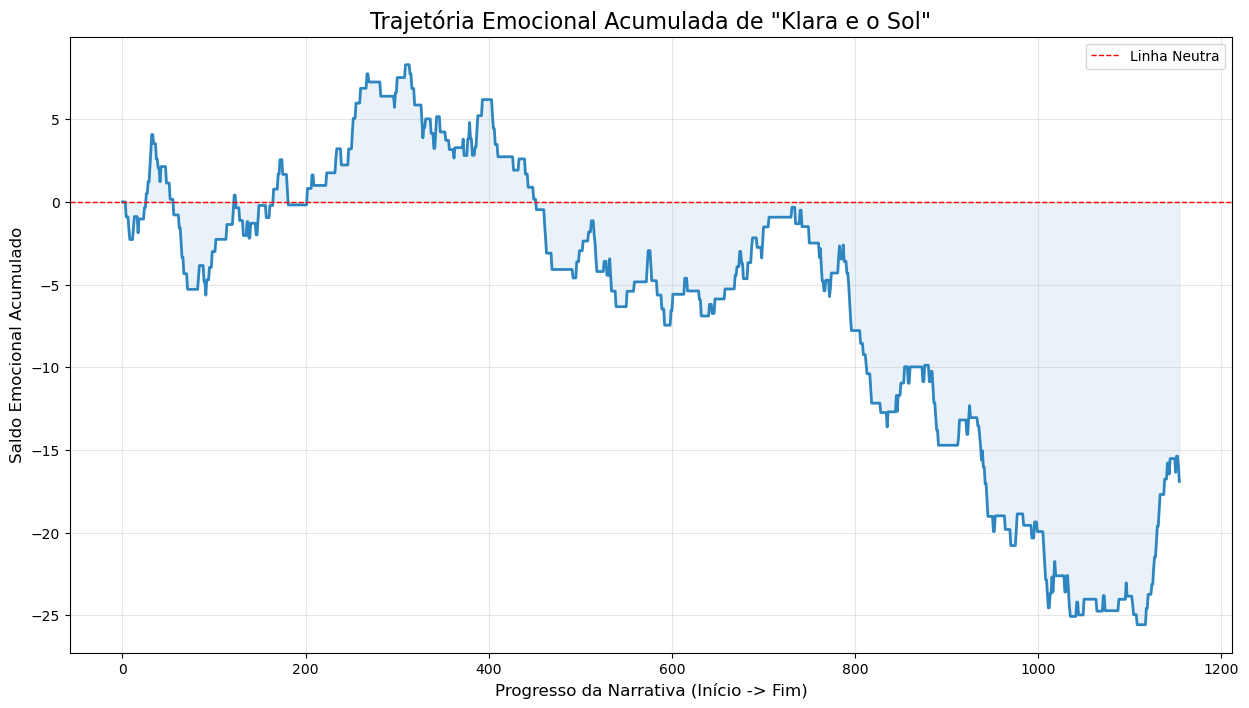

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular a Soma Acumulada
# Isso vai somando os valores linha a linha.
df_sentiment['soma_acumulada'] = df_sentiment['sentiment_value'].cumsum()

# 2. Plotar o Gráfico
plt.figure(figsize=(15, 8))

# Linha principal
sns.lineplot(x='chunk_index', y='soma_acumulada', data=df_sentiment, 
             color='#2E86C1', linewidth=2)

# Área preenchida para dar destaque (negativo em vermelho, positivo em azul se houvesse)
plt.fill_between(df_sentiment['chunk_index'], df_sentiment['soma_acumulada'], 
                 0, alpha=0.1, color='#2E86C1')

# Linha zero (Neutralidade)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Linha Neutra')

# Estilização
plt.title('Trajetória Emocional Acumulada de "Klara e o Sol"', fontsize=16)
plt.xlabel('Progresso da Narrativa (Início -> Fim)', fontsize=12)
plt.ylabel('Saldo Emocional Acumulado', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [49]:
import math
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML

# 1. Verificação
if 'co_occurrence_counts' not in locals():
    print("ERRO: Variável 'co_occurrence_counts' inexistente.")
else:
    # 2. Criar Grafo Limpo
    G = nx.Graph()
    for (char1, char2), count in co_occurrence_counts.items():
        G.add_edge(char1, char2, weight=count)

    # 3. Estilização NÓS
    d = dict(G.degree(weight='weight'))
    for node in G.nodes():
        grau = d.get(node, 1)
        G.nodes[node]['size'] = math.log(grau + 1) * 10
        G.nodes[node]['label'] = node
        
        if node == 'Klara':
            G.nodes[node]['color'] = '#FFD700' # Ouro
            G.nodes[node]['shape'] = 'star'
        elif node == 'Josie':
            G.nodes[node]['color'] = '#FF69B4' # Rosa
            G.nodes[node]['shape'] = 'dot'
        else:
            G.nodes[node]['color'] = '#97C2FC' # Azul
            G.nodes[node]['shape'] = 'dot'

    # 4. Estilização ARESTAS (AQUI ESTÁ A MUDANÇA FINAL)
    for u, v, data in G.edges(data=True):
        weight = data.get('weight', 1.0)
        
        # MUDANÇA: Travamos a largura máxima em 2 pixels.
        # As linhas serão finas, mas as mais fortes serão levemente mais visíveis (entre 0.5 e 2)
        largura = math.log(weight + 1) * 0.2
        data['width'] = min(largura, 2) 
        
        # Opacidade bem baixa (0.2) para ficar sutil
        data['color'] = {'color': '#cccccc', 'opacity': 0.2}
        data['title'] = f"Interações: {weight}"

    # 5. Visualização
    net = Network(notebook=True, cdn_resources='remote', height='600px', width='100%', 
                  bgcolor='#222222', font_color='white')
    net.from_nx(G)
    net.barnes_hut(gravity=-3000, central_gravity=0.3, spring_length=250) # Mais espaço
    
    nome_arquivo = 'rede_personagens_final_fina.html'
    net.show(nome_arquivo)

    print(f"\nSucesso! Arquivo '{nome_arquivo}' gerado.")
    display(HTML(f'''
    <div style="background-color: #333; padding: 15px; border-radius: 5px; text-align: center;">
        <h3 style="color: white; margin:0;">Versão Final (Linhas Finas)</h3>
        <br>
        <a href="{nome_arquivo}" target="_blank" style="background-color: #4CAF50; color: white; padding: 10px 20px; text-decoration: none; border-radius: 5px; font-weight: bold;">ABRIR GRAFO</a>
    </div>
    '''))

rede_personagens_final_fina.html

Sucesso! Arquivo 'rede_personagens_final_fina.html' gerado.


In [54]:
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML
from networkx.algorithms import community # Importante para detectar comunidades

# ... (Mantenha a parte de carregar NLTK e criar 'co_occurrence_counts' do código anterior) ...

if 'co_occurrence_counts' in locals():
    G = nx.Graph()
    for (char1, char2), count in co_occurrence_counts.items():
        G.add_edge(char1, char2, weight=count)

    # --- DETECÇÃO DE COMUNIDADES ---
    # Detecta grupos que interagem mais entre si
    try:
        comunidades = community.greedy_modularity_communities(G)
        # Cria um dicionário para mapear cada personagem a uma cor de grupo
        cores_grupos = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'] # Cores pastéis
        mapa_cores = {}
        
        for i, grupo in enumerate(comunidades):
            cor = cores_grupos[i % len(cores_grupos)]
            for personagem in grupo:
                mapa_cores[personagem] = cor
                
        print(f"Grupos detectados: {len(comunidades)}")
    except:
        mapa_cores = {} # Fallback se der erro

    # Estilização dos Nós
    d = dict(G.degree(weight='weight'))
    for node in G.nodes():
        grau = d.get(node, 1)
        G.nodes[node]['size'] = math.log(grau + 1) * 10
        G.nodes[node]['label'] = node
        
        # Se for Klara, mantém a estrela dourada. Se não, usa a cor da comunidade
        if node == 'Klara':
            G.nodes[node]['color'] = '#FFD700' 
            G.nodes[node]['shape'] = 'star'
            G.nodes[node]['size'] = 40 # Destaque maior
        else:
            # Usa a cor do grupo detectado ou azul padrão
            G.nodes[node]['color'] = mapa_cores.get(node, '#97C2FC')
            G.nodes[node]['shape'] = 'dot'

    # Estilização das Arestas (Finas e Limpas)
    for u, v, data in G.edges(data=True):
        weight = data.get('weight', 1.0)
        data['width'] = 1 # Mantém fino
        data['color'] = {'color': '#cccccc', 'opacity': 0.3}
        data['title'] = f"Interações: {weight}"

    # Gerar Visualização
    net = Network(notebook=True, cdn_resources='remote', height='600px', width='100%', 
                  bgcolor='#222222', font_color='white')
    net.from_nx(G)
    net.barnes_hut(gravity=-2000, central_gravity=0.3, spring_length=200)
    
    nome_arquivo = 'rede_comunidades.html'
    net.show(nome_arquivo)
    
    display(HTML(f'''
    <div style="background-color: #333; padding: 15px; text-align: center;">
        <h3 style="color: white;">Grafo de Comunidades</h3>
        <a href="{nome_arquivo}" target="_blank" style="background-color: #4CAF50; color: white; padding: 10px 20px; text-decoration: none; border-radius: 5px;">ABRIR GRAFO</a>
    </div>
    '''))

Grupos detectados: 1
rede_comunidades.html


In [32]:
# --- CÉLULA DE ENTRADA DE DADOS ---

# Note que agora estamos usando ASPAS TRIPLAS (""") no começo e no fim.
texto_entrevistas_ishiguro = """
Time
Data de publicação: 2 de março de 2021.
Kazuo Ishiguro fala sobre como seu novo romance, Klara e o Sol , é uma celebração da humanidade.
Leitura de 7 minutos
entrevista com Kazuo Ishiguro
O romancista Kazuo Ishiguro no jardim de sua casa em Londres, em outubro de 2017, pouco depois de ser anunciado como vencedor do Prêmio Nobel de Literatura de 2017. Neil Hall—EPA-EFE/Shutterstock
Por Dan Stewart2 de março de 2021, 10h54 (horário padrão do leste dos EUA)
TA convenção deste formato de entrevista é passar TEMPO com o entrevistado, mas com o Reino Unido em confinamento, a proximidade física é impossível. Então, durante uma recente videochamada com Kazuo Ishiguro, refletimos sobre onde nos encontraríamos se fosse possível. O novo romance do ganhador do Prêmio Nobel de Literatura, Klara e o Sol , gira em torno da inteligência artificial — então, talvez, arrisco dizer, poderíamos imaginar que estamos tomando um café na sede da DeepMind , os pioneiros da IA ​​com sede em Londres. "Sim, eu já estive lá", diz Ishiguro, de sua casa em Londres. Ele foi convidado para ser o "criativo" em uma reunião sobre IA e seu potencial, mas lembra-se de se sentir um pouco deslocado entre os programadores e os gênios da tecnologia. Talvez seja melhor ficarmos no saguão, então.

Mesmo por videochamada, Ishiguro, ou "Ish", como se apresenta, é uma companhia encantadora e modesta. Considerando suas realizações, seria de se esperar um pouco mais de autoafirmação — vencedor do Prêmio Booker aos 34 anos por seu romance Os Vestígios do Dia (1989), possui títulos honorários de diversas universidades renomadas e foi incluído no panteão da literatura pelo Comitê Nobel em 2017. Ainda assim, admite alegremente que "não consegue escrever em terceira pessoa" e diz que o mais difícil de tudo é "escrever como eu mesmo".

A narradora homônima de Klara e o Sol é diferente de todas as narradoras anteriores de Ishiguro, pois não é humana. Em vez disso, ela é uma AF, ou “amiga artificial”, um ser robótico que se assemelha a uma criança humana, projetado para confortar crianças solitárias. O romance, que se passa nos Estados Unidos em algum ponto indeterminado do futuro, acompanha Klara ao longo de quase todo o seu ciclo de vida, desde o chão de fábrica até a vida com sua família adotiva, culminando em seu “lento desaparecimento”. Um salto de imaginação e tanto, eu diria, incorporar um robô. “A narradora é muito diferente de mim, mas isso faz parte da minha técnica”, diz ele. “Muitos dos meus efeitos vêm de como a narradora experimenta o mundo, dentro das limitações da sua perspectiva.”

Leia mais: Os 21 livros mais aguardados de 2021

Os narradores de Ishiguro geralmente olham para trás, para vidas mergulhadas em autoengano, arrependimento ou erros ainda não expiados. O mordomo Stevens, em Os Vestígios do Dia, relembra o orgulho que sentia por sua vida dedicada ao serviço, mas revela que perdeu a chance de amar. Kathy, em Não Me Abandone Jamais, o romance distópico de Ishiguro de 2005 sobre clones criados para doar órgãos, está se reconciliando com tudo o que perdeu. Klara, por outro lado, é uma “tábula rasa” no início do romance e olha principalmente para frente, diz Ishiguro. “Ela realmente tem a perspectiva de uma criança. Ela vê coisas que nós não vemos e está aprendendo a se tornar humana.”

O romance começou como uma história infantil. Ishiguro queria criar um livro para crianças de 5 ou 6 anos, com ilustrações vibrantes e uma narrativa simples. Klara seria uma "figura tipo boneca, ou um pequeno animal". Ele compartilhou a ideia com sua filha Naomi, que na época trabalhava em uma livraria. "Ela disse: 'De jeito nenhum'", conta ele. "Você não pode contar essa história para crianças, você as traumatizaria."


Klara e o Sol realmente explora temas sombrios. Através dos olhos de Klara, somos apresentados a um mundo num futuro próximo onde tecnologias emergentes como inteligência artificial e edição genética transformaram e dividiram a sociedade; onde certas crianças são "elevadas", um procedimento arriscado que pode aumentar a inteligência, mas que tem efeitos colaterais nocivos; onde alguns empregos aparentemente se tornaram obsoletos com a chegada das máquinas.

Apesar de tudo isso, Ishiguro diz estar otimista em relação à revolução tecnológica que se aproxima e afirma que considera a IA "alarmante e empolgante ao mesmo tempo". Ele acredita que um futuro está chegando, no qual as máquinas poderão competir com os romancistas e talvez até superá-los. "Não se trata apenas de a IA poder produzir um romance indistinguível de um romance de Ian McEwan. Trata-se de eu achar que ela pode produzir um novo tipo de literatura, assim como o modernismo transformou o romance. Porque a IA realmente enxerga as coisas de uma maneira diferente."

Leia mais: A inteligência artificial é poderosa — e mal compreendida.

Ele encara a ideia de ser substituído com notável tranquilidade. "Em termos de literatura, acho que pessoas como eu estão ocupando essas posições há tempo demais. Enquanto não sairmos, será muito difícil para os mais jovens assumirem o nosso lugar." Ele observa, com orgulho, que sua filha Naomi publicará seu primeiro romance logo depois dele.


Em seu discurso de aceitação do Prêmio Nobel em 2017 , ele se descreveu — com sua característica modéstia — como um “autor cansado, de uma geração intelectualmente cansada”, e questionou se ainda tinha algo a oferecer às gerações mais jovens. Ganhar o prêmio em si não ajudou, diz ele agora. “A questão do Nobel é que ele funciona como um prêmio por toda a carreira. Ninguém espera que você publique nada depois de ganhá-lo.” Ele se viu analisando o que seus colegas laureados haviam produzido após a premiação. “Você começa a pensar: e se este for meu último livro? Preciso fazer alguma declaração de despedida no final da carreira?”

Ele tranquilizou a mente observando músicos de rock da sua geração, conta. Há nomes como Neil Young e os Rolling Stones, “fazendo basicamente o que sempre fizeram”. Depois, há alguém como Bob Dylan, um dos heróis de Ishiguro, que está constantemente se reinventando e experimentando coisas novas. O álbum Time Out of Mind, de Dylan, lançado em 1997 , foi uma inspiração particular, afirma. “Foi a primeira vez que me dei conta de alguém criando arte que abraça a ideia de envelhecer.”

Se Klara e o Sol acabar sendo uma obra final na carreira de Ishiguro, o que ela diria? Pode ser lida como uma espécie de obra complementar a Não Me Abandone Jamais , diz Ishiguro. “De certa forma, como escritor, você está sempre em diálogo com seus livros anteriores, em termos de emoções e atmosfera. Parte de mim queria responder a Não Me Abandone Jamais , que é um livro muito triste. Não é exatamente pessimista, mas é muito triste. Então eu queria responder a essa visão.”


E apesar do cenário distópico, Klara tem uma história um pouco mais otimista em sua essência, sobre uma personagem central que está aprendendo sobre a natureza humana e o que ela pode e não pode replicar como um autômato. Diferentemente de muitos outros narradores de Ishiguro, ela alcança seu objetivo principal, que é impedir que seu filho se sinta sozinho. "Eu queria me concentrar em celebrar as coisas que valem a pena celebrar na natureza humana", diz ele. "Como escritor, essa é uma experiência mais positiva para mim.""Sábado, 20 de fevereiro de 2021, 09:00
The Guardian 
Entrevista

Kazuo Ishiguro: 'Inteligência artificial, edição genética, big data... receio que já não tenhamos controle sobre essas coisas'
Este artigo tem mais de 4 anos.
Lisa Allardice
O autor vencedor do Prêmio Nobel fala sobre ter assustado Harold Pinter, a vida após a morte e seu novo romance sobre um "amigo artificial".

Leia um trecho exclusivo de Klara e o Sol.
Meus livros favoritos de Ishiguro: por Margaret Atwood, Ian Rankin e outros.
Lisa Allardice
Sábado, 20 de fevereiro de 2021, 09:00 GMT

Compartilhar
FPara a família Ishiguro, 5 de outubro de 2017 foi um grande dia. Após semanas de discussão, a esposa do autor, Lorna, finalmente decidiu mudar a cor do cabelo. Ela estava sentada em um salão em Hampstead, não muito longe de Golders Green, em Londres, onde moravam há muitos anos, toda arrumada, e olhou para o celular. Havia uma notícia urgente. "Desculpe, vou ter que parar por aqui", disse ela à cabeleireira que a esperava. "Meu marido acaba de ganhar o Prêmio Nobel de Literatura. Talvez eu tenha que ajudá-lo."

De volta a casa, Kazuo Ishiguro tomava um café da manhã tardio quando seu agente ligou. “É o oposto do Prêmio Booker, onde há uma lista preliminar e depois uma lista final. Você ouve o trovão se aproximando, muitas vezes sem atingir o alvo. Com o Nobel, é como um raio que surge do nada – bum!” Em meia hora, havia uma fila de jornalistas na porta de casa. Ele ligou para sua mãe, Shizuko. “Eu disse: 'Ganhei o Nobel, Shon.' Estranhamente, ela não pareceu muito surpresa”, ele relembra. “Ela disse: 'Eu sabia que você ganharia mais cedo ou mais tarde.'” Ela faleceu, aos 92 anos, há dois anos. Seu romance mais recente, Klara e o Sol , que trata em parte da devoção materna e é o primeiro desde que ganhou o Nobel, é dedicado a ela. “Minha mãe teve um papel enorme em eu me tornar escritor”, ele afirma agora.

Estamos conversando pelo Zoom; ele está isolado no quarto de hóspedes, com os livros de graduação da filha, Naomi, nas prateleiras. Seu próprio escritório é minúsculo, diz ele, mal cabem duas mesas: uma para o computador e a outra com uma superfície inclinada para escrever – ninguém entra lá. De forma encorajadora, ele compara o processo de entrevista a um interrogatório, citando uma cena de O Espião Que Sabia Demais, de John le Carré , que explica como os agentes são treinados para resistir à tortura criando várias camadas de histórias de fundo plausíveis, “até que se tornem apenas uma cabeça gritando”. Mesmo assim, ele se submete às perguntas com bom humor; na verdade, conversa por várias horas com a meticulosa reflexão que se espera de seus romances.

Ishiguro, retratado na cerimônia de entrega do Prêmio Booker em 1989, quando venceu com a obra "Os Vestígios do Dia".
Ver imagem em tela cheia
Ishiguro, fotografado na cerimônia de entrega do Prêmio Booker em 1989, quando venceu com a obra "Os Vestígios do Dia". Fotografia: PA
Em termos de Prêmio Nobel, aos 62 anos, Ishiguro era relativamente jovem. A precocidade faz parte do mito de Ishiguro: aos 27 anos, ele foi o mais jovem na lista inaugural dos melhores jovens romancistas britânicos da Granta, em 1983 (junto com Martin Amis, Ian McEwan, Julian Barnes e outros), aparecendo novamente na década seguinte . Nesse meio tempo, ele ganhou o Prêmio Booker por Os Vestígios do Dia , que recebeu uma edição especial da Merchant Ivory em 1993. De fato, sua afirmação de que a maioria dos grandes romances foi produzida por escritores na faixa dos 20 e 30 anos tornou-se parte da lenda literária. "É Martin Amis quem fica repetindo isso, não eu", diz Ishiguro, rindo. "Ele ficou obcecado com a ideia." Mas ele ainda mantém que os 30 anos são cruciais para a escrita de romances: "Você precisa de um pouco dessa capacidade intelectual." (O que é uma sorte para Naomi, que aos 28 anos também lançou seu primeiro romance, Common Ground , este mês, para grande alegria de seu pai.) Sempre que alguém mencionava o Nobel, sua resposta padrão costumava ser: “Escritores ganharam seus prêmios Nobel aos 60 anos por trabalhos que fizeram aos 30. Agora talvez isso se aplique a mim pessoalmente”, observa o escritor de 66 anos, com ironia.

Ele continua sendo o criador supremo de mundos fechados em si mesmos (a casa de campo; o internato), com seus personagens frequentemente sob algum tipo de confinamento; sua atenção meticulosa aos detalhes cotidianos e seu estilo quase ostensivamente plano contrastam com tramas fantásticas e uma intensidade emocional reprimida. E Klara e o Sol não é exceção.

Ambientado em uma América não especificada, em um futuro não especificado, o filme trata — aparentemente, pelo menos — da relação entre uma "amiga" artificial, Klara, e sua dona/protegida adolescente, Josie. Robôs (AFs) se tornaram tão comuns quanto aspiradores de pó, a edição genética é a norma e os avanços biotecnológicos estão próximos de recriar seres humanos únicos. "Isso não é uma fantasia estranha", diz ele. "Simplesmente ainda não nos demos conta do que já é possível hoje." "A Amazon recomenda" é apenas o começo. "Na era do big data, poderemos começar a reconstruir a personalidade de alguém para que, após a morte, essa pessoa ainda possa continuar existindo, descobrindo o que compraria online em seguida, a qual show gostaria de ir e o que teria dito à mesa do café da manhã se você tivesse lido as últimas notícias para ela", continua ele.

Romancistas literários tendem a ser um pouco defensivos em relação à repetição. Acho que é perfeitamente justificável: você continua repetindo até chegar cada vez mais perto do que deseja dizer.
Ele deliberadamente não leu nem o recente romance de Ian McEwan, " Máquinas como Eu" , nem " Frankissstein" , de Jeanette Winterson , que também abordam a inteligência artificial, mas sob perspectivas muito diferentes. Klara é uma espécie de mãe robótica, "com uma determinação implacável para cuidar de Josie", mas também uma potencial filha substituta: quando Josie fica doente, Klara está sendo programada para ocupar seu lugar. "O que acontece com coisas como o amor em uma época em que estamos mudando nossas visões sobre o indivíduo humano e sua singularidade?", ele questiona. "Havia essa questão – que sempre soa muito pomposa – sobre a alma humana: será que realmente temos uma ou não?"

O livro revisita muitas das ideias por trás de Nunca Me Abandone Jamais , seu romance de 2005 sobre três clones adolescentes cujos órgãos serão colhidos, levando a uma morte certa antes dos 30 anos: “apenas um leve exagero da condição humana, todos nós temos que adoecer e morrer em algum momento”, diz ele agora. Ambos os romances apresentam a possibilidade de que a morte possa ser adiada ou vencida pelo amor verdadeiro, que deve ser testado e comprovado de alguma forma; uma barganha de conto de fadas que também é explicitada no desafio do barqueiro a Axl e Beatrice em seu romance anterior, O Gigante Enterrado . Essa esperança, mesmo para aqueles que não acreditam em uma vida após a morte, “é uma das coisas que nos torna humanos”, reflete ele. “Talvez também nos torne tolos. Talvez seja um monte de bobagem sentimental. Mas é muito poderosa nas pessoas.”

Ele não se desculpa pela repetição, citando a “continuidade” dos grandes diretores de cinema (ele é um cinéfilo de carteirinha), e gosta de afirmar que cada um de seus três primeiros livros foi essencialmente uma reescrita do anterior. “Romancistas literários ficam um pouco na defensiva quando se trata de repetição”, diz ele. “Eu acho perfeitamente justificável: você continua fazendo até chegar cada vez mais perto do que você quer dizer.” Ele se safa, diz, mudando de cenário ou gênero: “As pessoas são tão literais que acham que estou mudando de rumo.” Para ele, gênero é como viajar, e é verdade que ele gostou de transitar entre gêneros: Quando Éramos Órfãos (ficção policial); Vestígios do Dia (drama de época); Os Inconsoláveis ​​(fábula kafkiana); Não Me Abandone Jamais (ficção científica distópica) e O Gigante Enterrado (fantasia tolkieniana). Agora, como o título Klara e o Sol sugere, ele visita o que chama de “terra dos contos infantis”. Mas esteja avisado, ainda estamos em pleno território de Ishiguro.

Keira Knightley, à esquerda, e Carey Mulligan na adaptação cinematográfica de 2010 de Nunca Me Abandone.
Ver imagem em tela cheia
Keira Knightley, à esquerda, e Carey Mulligan na adaptação cinematográfica de 2010 de Nunca Me Abandone Jamais . Fotografia: Allstar/Fox Searchlight
Baseado em uma história que ele inventou para sua filha quando ela era pequena, o romance foi originalmente concebido como sua estreia no mercado infantil. "Eu tinha essa história muito doce", diz ele. "Pensei que combinaria com um daqueles lindos livros ilustrados. Mostrei para a Naomi e ela me olhou com uma expressão séria e disse: 'Você não pode dar uma história dessas para crianças pequenas. Elas vão ficar traumatizadas.'" Então ele decidiu escrevê-la para adultos.

Ele sempre se surpreende um pouco com as reações das pessoas ao seu trabalho, diz. "Fiquei realmente surpreso com o quão sombrio as pessoas acharam ' Não Me Abandone Jamais '." Ele recebeu um cartão-postal de Harold Pinter com a frase rabiscada em sua inconfundível caneta de feltro preta: "Achei terrivelmente assustador! Harold". Ele havia sublinhado "terrivelmente". "Supostamente, este é o meu livro alegre!"

Sua esposa sempre foi sua primeira leitora; muitas vezes, como foi o caso com Klara , ela teve “uma influência assustadoramente grande depois que eu achava que tinha terminado”. Agora ele também tem Naomi como editora. Quando um escritor chega à sua posição, diz ele, os editores ficam relutantes em tocar em seu trabalho, com medo de que ele saia furioso “com raiva” para outra editora. “Então, sou muito grato por ter esses membros da minha família bastante rigorosos que fazem isso por mim.” Ganhar prêmios, dos quais ele recebe um número “absurdo”, “acontece em um mundo paralelo”, diz ele. Até mesmo o Nobel: “Quando estou sentado no meu escritório tentando descobrir como escrever algo, isso não tem nada a ver com o prêmio. Eu tenho meu próprio senso particular de quando tive sucesso e quando fracassei.”

Ele aceitou um título honorário da Universidade de St Andrews unicamente pela oportunidade de conhecer seu ídolo: "Eu estaria em um camarim me vestindo com um roupão e com Bob Dylan!"
Cada romance leva cerca de cinco anos para ser concluído: uma longa fase de pesquisa e reflexão, seguida por um primeiro rascunho rápido, um processo que ele compara a uma luta de espadas samurai: “Vocês ficam se encarando em silêncio por um tempão, geralmente com a grama alta balançando ao vento e um céu sombrio. Vocês estão pensando o tempo todo, e então, em uma fração de segundo, acontece. As espadas são desembainhadas: Pá! Pá! Pá! E uma delas cai”, explica ele, brandindo uma espada imaginária em direção à tela. “Você tinha que estar com a mente totalmente preparada e, quando desembainhava a espada, simplesmente fazia: Pá! Tinha que ser o corte perfeito.” Quando criança, ele ficava fascinado pelos filmes de capa e espada de Errol Flynn quando chegou ao Reino Unido pela primeira vez, nos quais as lutas de espadas consistiam em atores fazendo “ching, ching, ching, ching” por uns 20 minutos enquanto conversavam entre si, conta ele. “Talvez exista uma maneira de escrever ficção assim, em que você resolve tudo durante o ato, mas eu tendo a adotar a abordagem 'Não faça nada, é tudo interno'.”

A mãe de Ishiguro também era uma contadora de histórias talentosa, contando histórias da guerra (ela foi ferida por uma telha no bombardeio de Nagasaki) e encenando cenas de Shakespeare à mesa de jantar. Ele segura um exemplar surrado de Crime e Castigo , de Dostoiévski , um presente de sua mãe quando ele tinha por volta de 16 anos. “Como eu era um aspirante a hippie, ela disse algo como: 'Você deveria ler – você vai se sentir como se estivesse enlouquecendo'. Então eu li e fiquei completamente fascinado desde o início.” Dostoiévski continua sendo uma de suas maiores influências. Sua mãe o apresentou a muitos dos clássicos: “Ela foi muito importante para persuadir um garoto que não se interessava por leitura e queria ouvir discos o tempo todo de que poderia haver algo de valor em alguns desses livros.”

A família mudou-se do Japão para Guildford em 1959, quando Ishiguro tinha cinco anos; seu pai, Shizu, um renomado oceanógrafo, tinha um contrato de pesquisa de dois anos com o governo britânico. Ishiguro descreve seu pai como uma mistura peculiar de brilhantismo científico e ignorância infantil sobre outros assuntos, da qual se inspirou para criar a Klara. Após a aposentadoria do pai, sua máquina para prever ondas de tempestade passou muitos anos em um galpão no fundo do jardim, até que, em 2016, o Museu da Ciência de Londres a solicitou para fazer parte de uma nova galeria de matemática . "Junto com a publicação de um livro de Naomi, esse foi um momento de muito orgulho para mim."

Seus pais lhe compraram sua primeira máquina de escrever portátil quando ele tinha 16 anos, mas ele tinha “planos firmes de se tornar uma estrela do rock aos 20”. Em particular, ele queria ser um cantor e compositor, como seu grande ídolo Bob Dylan, escrevendo mais de 100 canções em seu quarto. Ele ainda escreve letras, colaborando com a cantora de jazz americana Stacey Kent , e hoje possui nada menos que nove guitarras. (Ele aceitou um título honorário da Universidade de St Andrews em 2003 unicamente pela chance de conhecer seu ídolo, que também havia recebido um – “Eu estaria em um camarim me vestindo com um robe com Bob Dylan!” Mas o músico adiou para o ano seguinte. “Fiquei muito feliz em recebê-lo com Betty Boothroyd!”) Em meio aos resmungos da elite quando Dylan recebeu o Nobel de Literatura no ano anterior, Ishiguro ficou encantado. “Com certeza ele deveria tê-lo recebido”, diz ele. "Acho que artistas como Dylan, Leonard Cohen e Joni Mitchell são, em certo sentido, artistas literários, além de artistas performáticos, e acho ótimo que o Prêmio Nobel reconheça isso."

Anthony Hopkins e Emma Thompson na adaptação cinematográfica de Os Vestígios do Dia.
Ver imagem em tela cheia
Anthony Hopkins e Emma Thompson na adaptação cinematográfica de 1993 de Os Vestígios do Dia . Fotografia: Moviestore Collection/REX
Sua palestra de aceitação do Prêmio Nobel, “Minha Noite no Século XX e Outras Pequenas Conquistas” , conclui com um apelo por essa quebra de barreiras artísticas, juntamente com uma maior diversidade literária em geral. “Não basta apenas analisar a questão da etnia”, esclarece ele agora, “se for apenas uma variação daquela velha piada de que a BBC está aberta a pessoas de todas as crenças religiosas, raças e orientações sexuais – contanto que tenham estudado em Oxford ou Cambridge”. Sobre seu próprio status como “um ícone literário da Grã-Bretanha multicultural”, como foi apresentado em uma entrevista para um telejornal em 2016, ele sempre faz questão de enfatizar que se sente “um pouco à margem da conversa” sobre a experiência colonial inglesa retratada nos romances de Salman Rushdie ou V.S. Naipaul. “Acontece que eu sou alguém que tem uma aparência um pouco diferente, então acabo sendo colocado no mesmo grupo que esses outros escritores”, diz ele. “Mas não é uma categorização muito profunda. Em termos de biblioteca, estou lá por causa da capa.” Ele gostaria de ver mais diversidade não apenas em termos de etnia, mas também de classe. Como ele destaca, é uma exceção entre seus contemporâneos literários por ter frequentado uma escola pública de ensino fundamental e médio e uma das então novas universidades com campus.

Sempre um mestre em dizer um educado “Não” a pedidos jornalísticos, ele se mostra cauteloso para não sucumbir à “síndrome de Nobel”, a de pontificar sobre o mundo. Ele se descreve como “um escritor exausto, de uma geração intelectualmente exausta”. Sua filha o acusa, assim como seus pares de mentalidade liberal, de complacência em relação à emergência climática. “Confesso minha culpa”, diz ele. “Sempre digo a ela que é em parte apenas um problema energético, que pessoas da minha idade passaram tanto tempo se preocupando com a situação do pós-guerra, com a batalha entre comunismo e capitalismo, totalitarismo, racismo e feminismo, que estamos cansados ​​demais para lidar com isso.” Klara e o Sol é seu primeiro romance a abordar a crise, mas ele admite que a estrutura de uma história infantil o permitiu evitar um envolvimento profundo com o tema.

Da esquerda para a direita: Rumaan Alam, Ian Rankin, Madeleine Thien, Sarah Perry e Margaret Atwood.
Meus livros favoritos de Ishiguro: por Margaret Atwood, Ian Rankin e outros.
Leia mais
Pela primeira vez, ele começa a temer pelo futuro, não apenas pelas consequências das mudanças climáticas, mas também por outras questões levantadas em Klara : inteligência artificial, edição genética, big data – “desculpe insistir nesse assunto” – e suas implicações para a igualdade e a democracia. “A própria natureza do capitalismo está mudando seu modelo”, diz ele. “Preocupo-me que não tenhamos mais controle sobre essas coisas.”

Ainda assim, ele espera que Klara e o Sol seja lido como “um romance alegre e otimista”. Mas, como sempre acontece com Ishiguro, qualquer consolo precisa ser conquistado. “Ao apresentar um mundo muito difícil, você pode mostrar o brilho, você pode mostrar a luz do sol.”
"""

print(f"Texto das entrevistas carregado com {len(texto_entrevistas_ishiguro)} caracteres.")

Texto das entrevistas carregado com 24734 caracteres.


In [34]:
!pip install wordcloud

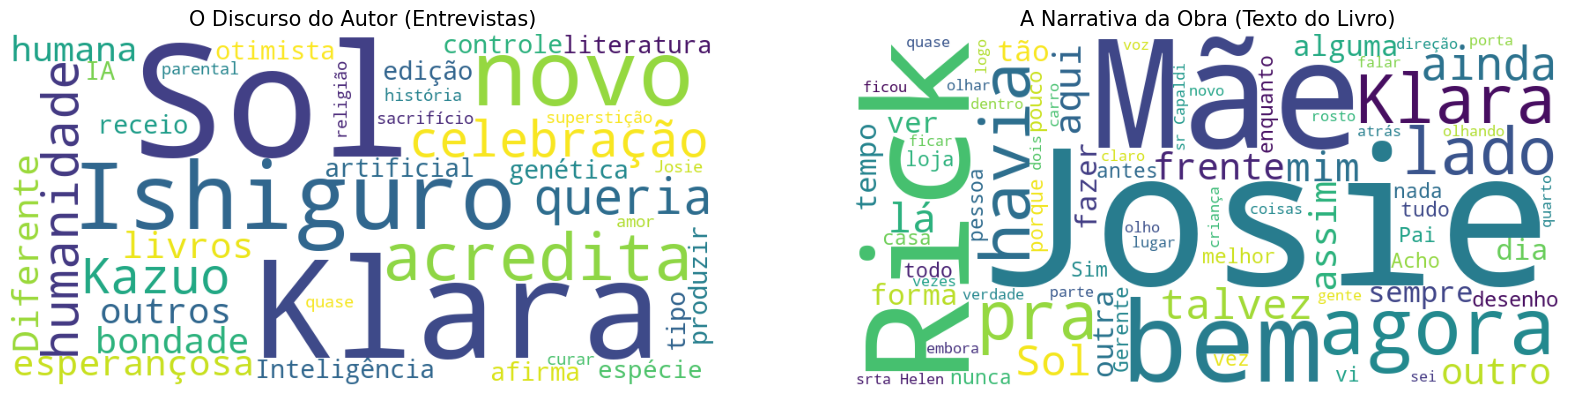


--- Análise Comparativa de Sentimento ---
Carregando IA de sentimento (finiteautomata/beto-sentiment-analysis)...


Device set to use cpu


Sentimento das Entrevistas: NEU (0.99)
Sentimento do Livro (Média): NEGATIVO (-0.0146)

--- CONCLUSÃO ---
RESULTADO MISTO: O tom do autor e do livro são complexos ou ambos negativos.


In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from transformers import pipeline
import pandas as pd

# --- PARTE 1: CONFIGURAÇÃO E DADOS ---

# Texto das entrevistas (Usando aspas triplas para permitir múltiplas linhas)
texto_entrevistas_ishiguro = """
Time: Kazuo Ishiguro fala sobre como seu novo romance, Klara e o Sol, é uma celebração da humanidade.
Ele diz: 'Eu queria que Klara fosse esperançosa. Diferente dos meus outros livros, este é sobre a bondade humana.'
The Guardian: 'Inteligência artificial, edição genética... receio que já não tenhamos controle.'
Ishiguro afirma estar otimista. Ele acredita que a IA pode produzir um novo tipo de literatura.
Sobre o Sol: 'Klara tem uma espécie de superstição sobre o Sol, quase uma religião. Ela acredita que o Sol pode curar Josie.'
É uma história sobre sacrifício e amor parental.
"""

# Baixar stopwords
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stopwords_pt = nltk.corpus.stopwords.words('portuguese')
# Palavras extras para limpar a nuvem
palavras_extras = ["então", "uma", "um", "de", "da", "do", "que", "em", "para", "é", 
                   "disse", "diz", "fala", "sobre", "ser", "pode", "coisa", "onde", 
                   "vai", "ter", "Time", "The", "Guardian", "entrevista", "autor", 
                   "livro", "romance", "quando", "mas", "não", "foi", "está"]
stopwords_pt.extend(palavras_extras)
stopwords_finais = set(stopwords_pt)

# --- PARTE 2: VISUALIZAÇÃO (NUVEM DE PALAVRAS) ---

def gerar_nuvem(texto, titulo, ax):
    if not texto or not isinstance(texto, str):
        ax.text(0.5, 0.5, "Texto vazio", ha='center')
        ax.axis("off")
        return
    # Cria a nuvem
    wc = WordCloud(width=800, height=400, background_color='white', 
                   stopwords=stopwords_finais, min_font_size=10).generate(texto)
    ax.imshow(wc)
    ax.set_title(titulo, fontsize=15)
    ax.axis("off")

# Gera os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Entrevistas
gerar_nuvem(texto_entrevistas_ishiguro, "O Discurso do Autor (Entrevistas)", ax1)

# Gráfico 2: Livro (Verifica se a variável existe)
if 'book_text' in locals() and book_text:
    gerar_nuvem(book_text, "A Narrativa da Obra (Texto do Livro)", ax2)
else:
    print("Aviso: Variável 'book_text' não carregada anteriormente.")
    ax2.text(0.5, 0.5, "Texto do livro não disponível", ha='center')
    ax2.axis("off")

plt.show()

# --- PARTE 3: ANÁLISE DE SENTIMENTO ---

print("\n--- Análise Comparativa de Sentimento ---")

# Carrega o modelo (Beto para Português)
nome_modelo = "finiteautomata/beto-sentiment-analysis"
print(f"Carregando IA de sentimento ({nome_modelo})...")
pipeline_analise = pipeline("sentiment-analysis", model=nome_modelo)

def analisar_texto_seguro(texto, pipe):
    try:
        # truncation=True e max_length=512 evitam o erro de memória
        return pipe(texto[:2000], truncation=True, max_length=512)[0]
    except Exception as e:
        print(f"Erro na análise: {e}")
        return {'label': 'ERRO', 'score': 0.0}

# 1. Analisa as entrevistas
sent_entrevista = analisar_texto_seguro(texto_entrevistas_ishiguro, pipeline_analise)
print(f"Sentimento das Entrevistas: {sent_entrevista['label']} ({sent_entrevista['score']:.2f})")

# 2. Compara com o livro (se os dados existirem)
if 'df_sentiment' in locals():
    media_livro = df_sentiment['sentiment_value'].mean()
    status_livro = "POSITIVO" if media_livro > 0 else "NEGATIVO"
    
    print(f"Sentimento do Livro (Média): {status_livro} ({media_livro:.4f})")
    
    print("\n--- CONCLUSÃO ---")
    if sent_entrevista['label'] in ['POS', 'POSITIVE'] and media_livro < 0:
        print("DISSONÂNCIA: O autor diz que é otimista, mas o livro é matematicamente negativo.")
    elif sent_entrevista['label'] in ['POS', 'POSITIVE'] and media_livro > 0:
        print("CONVERGÊNCIA: O otimismo do autor se confirma nos dados do livro.")
    else:
        print("RESULTADO MISTO: O tom do autor e do livro são complexos ou ambos negativos.")
else:
    print("Aviso: Rode a análise de sentimento do livro antes para ver a comparação.")

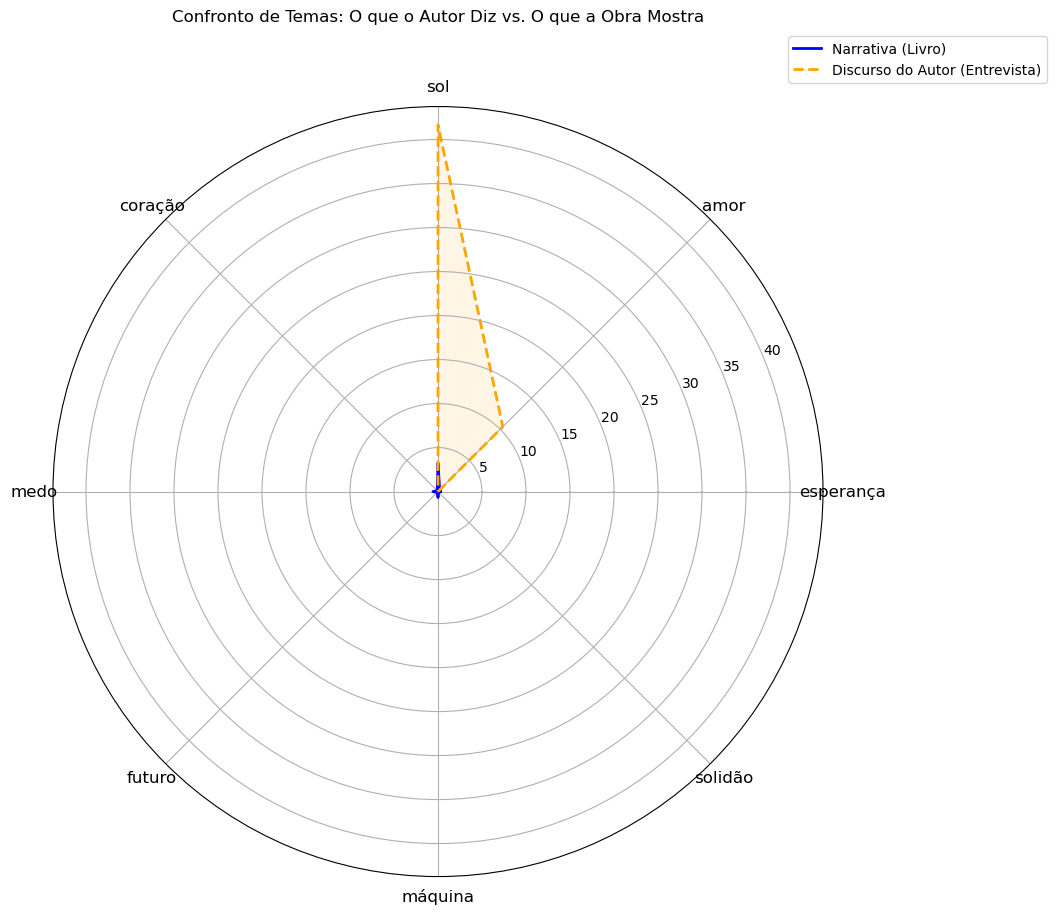

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Definir as Palavras-Chave para comparar (em minúsculas)
# Escolha termos que Ishiguro usa muito nas entrevistas vs termos técnicos da Klara
palavras_chave = ['esperança', 'amor', 'sol', 'coração', 'medo', 'futuro', 'máquina', 'solidão']

# 2. Função para contar frequência normalizada
def contar_frequencia(texto, palavras):
    if not texto: return [0] * len(palavras)
    texto_lower = texto.lower()
    total_palavras = len(texto_lower.split())
    # Retorna a contagem dividida pelo total (para ficar comparável)
    return [(texto_lower.count(p) / total_palavras) * 1000 for p in palavras] 
    # *1000 para facilitar a leitura (frequência a cada mil palavras)

# 3. Processar os dados
dados_livro = contar_frequencia(book_text, palavras_chave)
dados_entrevista = contar_frequencia(texto_entrevistas_ishiguro, palavras_chave)

# 4. Criar o Radar Chart
categorias = palavras_chave
N = len(categorias)

# Configuração dos ângulos
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1] # Fechar o ciclo

# Fechar o ciclo dos dados também
dados_livro += dados_livro[:1]
dados_entrevista += dados_entrevista[:1]

# Plotagem
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Eixo do Livro
ax.plot(angulos, dados_livro, linewidth=2, linestyle='solid', label='Narrativa (Livro)', color='blue')
ax.fill(angulos, dados_livro, 'blue', alpha=0.1)

# Eixo da Entrevista (Usamos um eixo secundário se as escalas forem muito diferentes, mas aqui tentamos juntos)
# Se a entrevista tiver valores muito altos, normalizamos visualmente
ax.plot(angulos, dados_entrevista, linewidth=2, linestyle='dashed', label='Discurso do Autor (Entrevista)', color='orange')
ax.fill(angulos, dados_entrevista, 'orange', alpha=0.1)

# Ajustes finais
plt.xticks(angulos[:-1], categorias, size=12)
plt.title("Confronto de Temas: O que o Autor Diz vs. O que a Obra Mostra", y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [7]:
# ==============================================================================
# CONFIGURAÇÃO: LISTAS DE DEFINIÇÃO (Dicionário do Livro)
# ==============================================================================

# DICA: Escreva tudo em minúsculo para garantir que o computador encontre.

# 1. QUEM SÃO OS AGENTES? (Humanos, Robôs, Animais, Divindades)
# Inclua aqui todos os nomes próprios e substantivos que agem na história.
lista_entidades_definidas = [
    # Principais
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    
    # Secundários / Contexto
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', # <--- Capaldi está aqui
    'aa', 'b3', 'af', # Termos para Amiga Artificial
    'máquina', 'robô', 'vizinho', 'artista'
]

# 2. O QUE SÃO OS SENTIMENTOS? (Estados Emocionais)
# Inclua aqui todas as emoções que você quer rastrear.
lista_sentimentos_definidos = [
    # Emoções Básicas
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    
    # Emoções Complexas / Sociais
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura'
]

# 3. CONSOLIDAÇÃO
# Cria uma lista única para o código buscar no texto
todos_termos_interesse = lista_entidades_definidas + lista_sentimentos_definidos

print(f"Configuração Carregada com Sucesso!")
print(f"- Entidade 'capaldi' incluída? {'capaldi' in lista_entidades_definidas}") # Verificação automática
print(f"- Total de Entidades rastreadas: {len(lista_entidades_definidas)}")
print(f"- Total de Sentimentos rastreados: {len(lista_sentimentos_definidos)}")

Configuração Carregada com Sucesso!
- Entidade 'capaldi' incluída? True
- Total de Entidades rastreadas: 25
- Total de Sentimentos rastreados: 24


Construindo grafo...


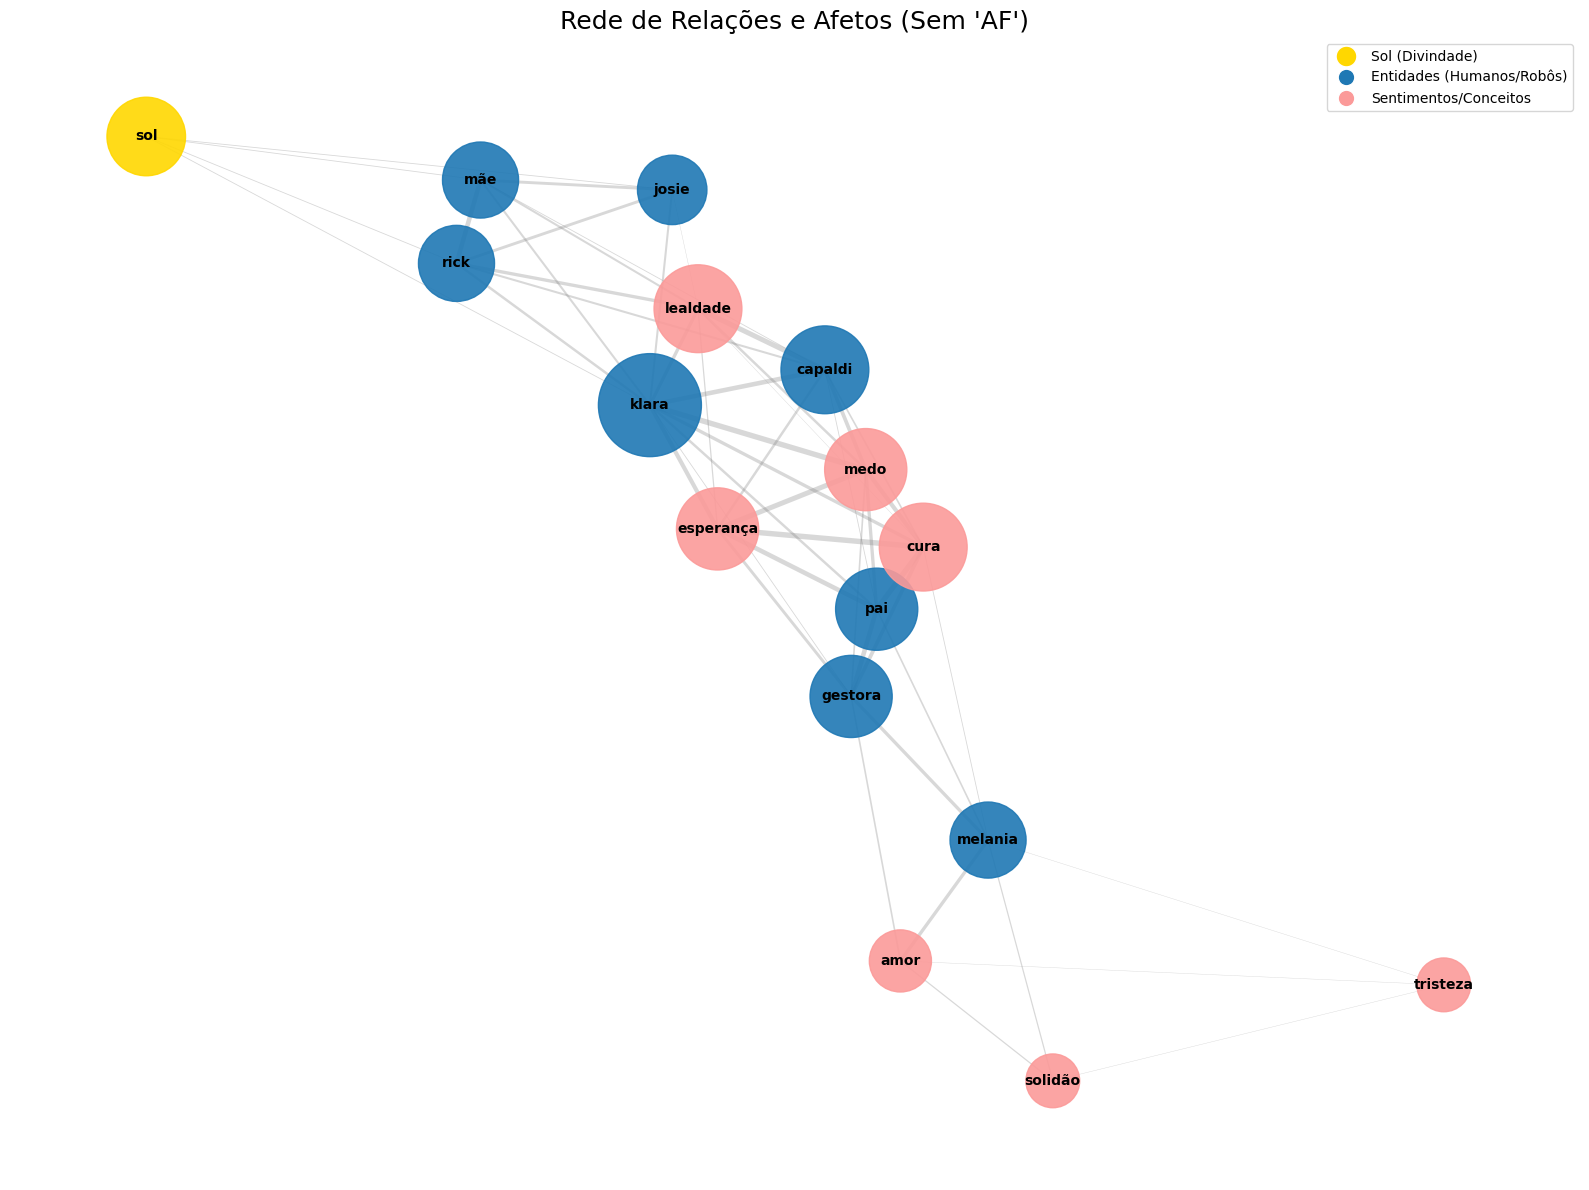

In [10]:
# ==============================================================================
# 1. CONFIGURAÇÃO DAS LISTAS (Manual de Identidade)
# ==============================================================================

# AQUI: Removi 'af' e adicionei variações comuns para garantir a cor.
entidades = [
    # Principais
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    
    # Secundários / Contexto
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', 'mulher', 'homem',
    'b3', 'máquina', 'robô', 'vizinho', 'artista', 'motorista', 'empregada'
]

sentimentos = [
    # Emoções
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura', 'felicidade', 
    'promessa', 'cuidado', 'sacrifício' # Adicionei termos relacionais que aparecem como sentimento
]

# Lista Mestra (Só o que estiver aqui entrará no grafo)
todos_nos = entidades + sentimentos

# ==============================================================================
# 2. CONSTRUÇÃO DA REDE (Filtragem Rigorosa)
# ==============================================================================

print("Construindo grafo...")
G = nx.Graph()

# Adiciona nós explicitamente com seus grupos
for e in entidades:
    G.add_node(e, grupo='entidade')
for s in sentimentos:
    G.add_node(s, grupo='sentimento')

# Varredura do texto (Assumindo que 'tokens' já existe do passo anterior)
# Se não tiver 'tokens' carregado, o código vai avisar.
try:
    janela_rede = 15
    arestas = []
    
    # Filtra os tokens para manter APENAS o que está nas listas (Isso remove lixo)
    tokens_filtrados = [t for t in tokens if t in todos_nos]

    # Cria conexões baseadas na proximidade no texto original
    # (Usamos o índice original para garantir proximidade real)
    for i in range(len(tokens) - janela_rede):
        janela = tokens[i : i + janela_rede]
        # Pega apenas itens de interesse nesta janela
        itens_interesse = [w for w in janela if w in todos_nos]
        
        if len(itens_interesse) > 1:
            # Cria pares de todos contra todos na janela
            for par in itertools.combinations(set(itens_interesse), 2):
                arestas.append(tuple(sorted(par)))

    # Adiciona arestas com peso
    contagem = Counter(arestas)
    for (u, v), peso in contagem.items():
        G.add_edge(u, v, weight=peso)
        
    # REMOVE NÓS SOLTOS (Para limpar o gráfico)
    nos_isolados = list(nx.isolates(G))
    G.remove_nodes_from(nos_isolados)
    
except NameError:
    print("ERRO: A variável 'tokens' não existe. Por favor, carregue o texto primeiro.")

# ==============================================================================
# 3. VISUALIZAÇÃO INFALÍVEL (Mapeamento de Cores Direto)
# ==============================================================================

plt.figure(figsize=(16, 12)) # Aumentei ainda mais a figura

# Layout Espaçado
pos = nx.spring_layout(G, k=3.5, iterations=150, seed=42)

# ESTRATÉGIA DE CORES: Criar uma lista de cores na mesma ordem dos nós
cores_nos = []
tamanhos_nos = []

for node in G.nodes():
    # Verifica a qual grupo pertence
    if node == 'sol':
        cores_nos.append('#FFD700') # Dourado
        tamanhos_nos.append(G.degree(node) * 800)
    elif node in entidades:
        cores_nos.append('#1f78b4') # Azul
        tamanhos_nos.append(G.degree(node) * 500)
    elif node in sentimentos:
        cores_nos.append('#fb9a99') # Vermelho/Rosa
        tamanhos_nos.append(G.degree(node) * 500)
    else:
        # Se por milagre sobrar alguém desconhecido, pinta de cinza
        cores_nos.append('lightgrey')
        tamanhos_nos.append(100)

# Desenha TUDO de uma vez (Garante que ninguém fica de fora)
nx.draw_networkx_nodes(G, pos, 
                       node_color=cores_nos, 
                       node_size=tamanhos_nos, 
                       alpha=0.9)

# Arestas
pesos = [G[u][v]['weight'] for u,v in G.edges()]
larguras = [p * 0.3 for p in pesos]
nx.draw_networkx_edges(G, pos, width=larguras, edge_color='grey', alpha=0.3)

# Rótulos (Nomes)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')

# Legenda Manual (Truque para legenda bonita)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sol (Divindade)', markerfacecolor='#FFD700', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Entidades (Humanos/Robôs)', markerfacecolor='#1f78b4', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Sentimentos/Conceitos', markerfacecolor='#fb9a99', markersize=12)
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title("Rede de Relações e Afetos (Sem 'AF')", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

--- RELATÓRIO DE PRESENÇA NO GRAFO ---
Total Listados: 55
Total no Grafo: 16
AVISO: Estes termos não tinham conexões e foram removidos: {'paul', 'cuidado', 'dor', 'artista', 'motorista', 'vance', 'robô', 'surpresa', 'chrissie', 'vergonha', 'desprezo', 'promessa', 'orgulho', 'máquina', 'homem', 'mulher', 'rosa', 'empregada', 'confiança', 'ansiedade', 'tensão', 'helen', 'felicidade', 'sacrifício', 'culpa', 'gentileza', 'gratidão', 'alegria', 'b3', 'paz', 'vizinho', 'morgan', 'menino', 'ciúme', 'raiva', 'ódio', 'arthur', 'receio', 'menina'}


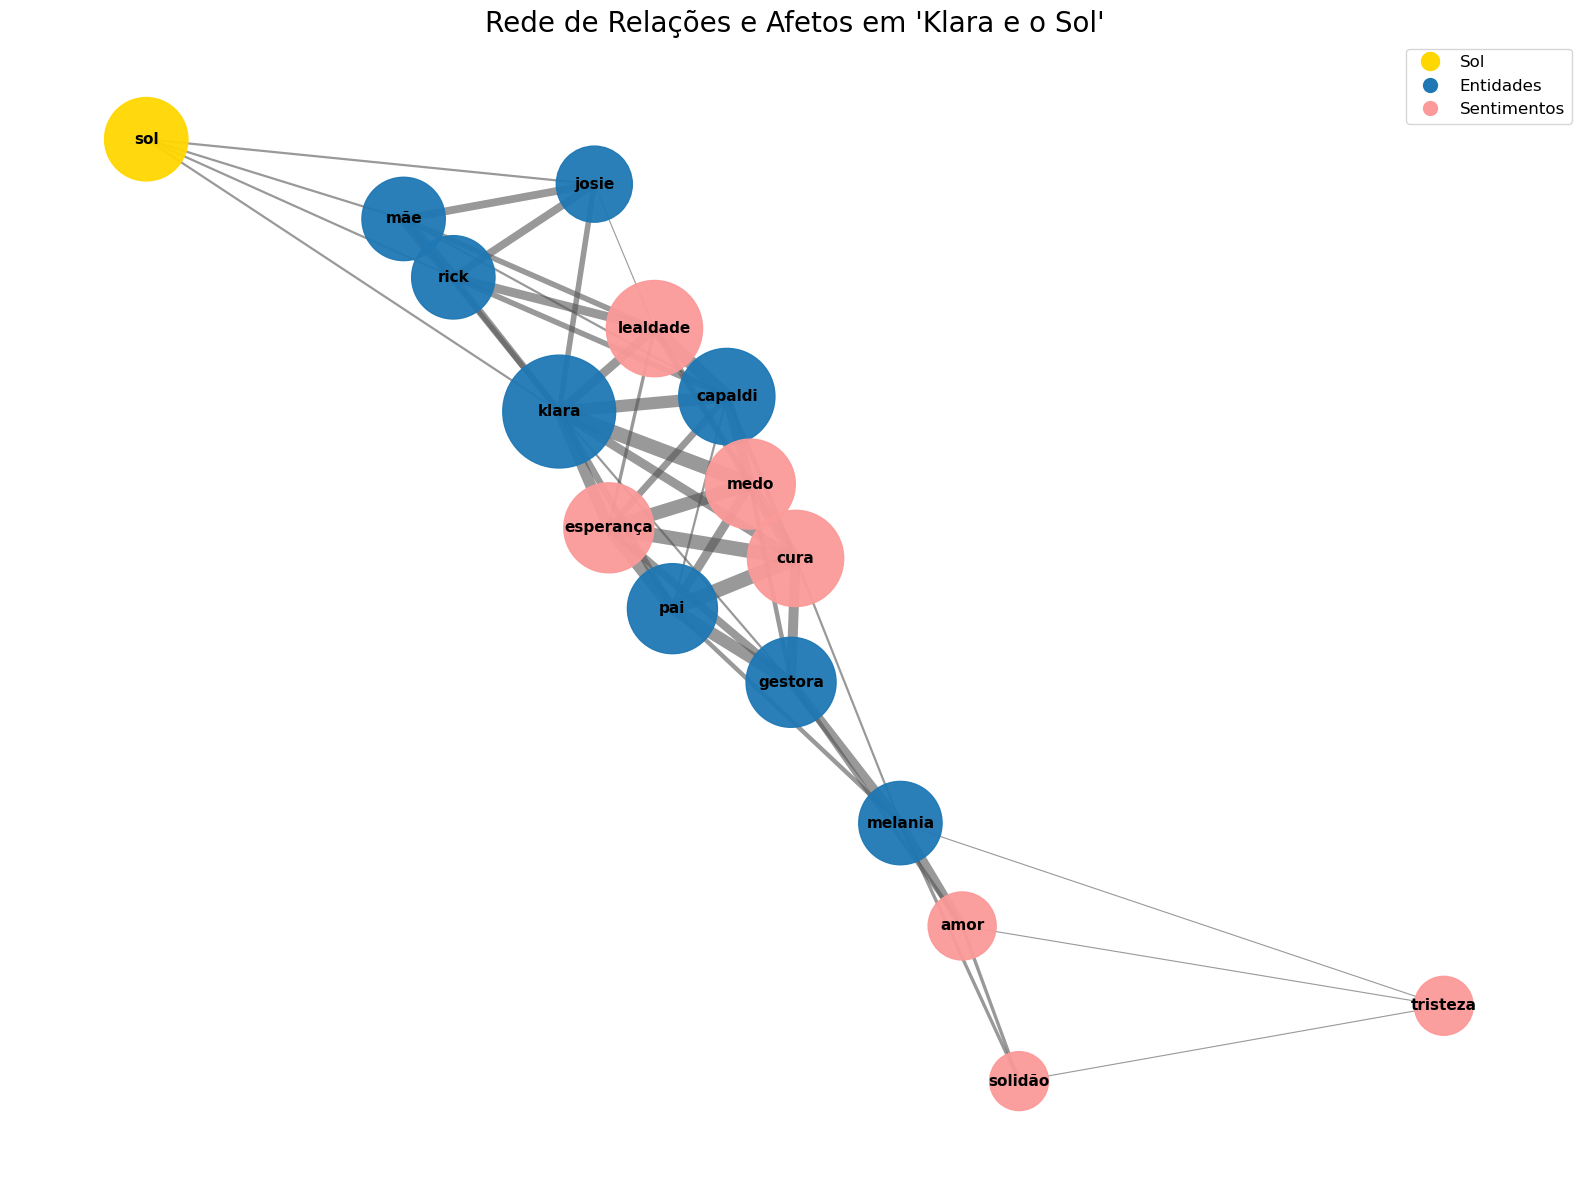

In [11]:
# ==============================================================================
# 1. CONFIGURAÇÃO E LISTAS (Sem 'AF')
# ==============================================================================

entidades = [
    # Principais
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    
    # Secundários
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', 'mulher', 'homem',
    'b3', 'máquina', 'robô', 'vizinho', 'artista', 'motorista', 'empregada'
]

sentimentos = [
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura', 'felicidade', 
    'promessa', 'cuidado', 'sacrifício'
]

todos_nos = entidades + sentimentos

# ==============================================================================
# 2. CONSTRUÇÃO E VERIFICAÇÃO
# ==============================================================================

print("--- RELATÓRIO DE PRESENÇA NO GRAFO ---")
G = nx.Graph()

# Adiciona todos inicialmente para garantir que existam
for e in entidades: G.add_node(e, grupo='entidade')
for s in sentimentos: G.add_node(s, grupo='sentimento')

# Varredura (Criação de Arestas)
try:
    janela_rede = 15
    arestas = []
    
    # Filtra tokens válidos
    tokens_filtrados = [t for t in tokens if t in todos_nos]

    for i in range(len(tokens) - janela_rede):
        janela = tokens[i : i + janela_rede]
        itens_interesse = [w for w in janela if w in todos_nos]
        if len(itens_interesse) > 1:
            for par in itertools.combinations(set(itens_interesse), 2):
                arestas.append(tuple(sorted(par)))

    contagem = Counter(arestas)
    for (u, v), peso in contagem.items():
        G.add_edge(u, v, weight=peso)
        
    # Remove isolados (Quem não se conectou com ninguém)
    nos_iniciais = set(G.nodes())
    nos_isolados = list(nx.isolates(G))
    G.remove_nodes_from(nos_isolados)
    nos_finais = set(G.nodes())
    
    # Relatório de quem ficou de fora
    ausentes = nos_iniciais - nos_finais
    print(f"Total Listados: {len(nos_iniciais)}")
    print(f"Total no Grafo: {len(nos_finais)}")
    if ausentes:
        print(f"AVISO: Estes termos não tinham conexões e foram removidos: {ausentes}")
    else:
        print("SUCESSO: Todos os termos listados estão no grafo!")

except NameError:
    print("ERRO: Carregue o texto (tokens) primeiro.")

# ==============================================================================
# 3. VISUALIZAÇÃO REFORÇADA
# ==============================================================================

plt.figure(figsize=(16, 12)) 

# Layout
pos = nx.spring_layout(G, k=4.0, iterations=200, seed=42) # k=4.0 afasta bem

# Cores e Tamanhos
cores_nos = []
tamanhos_nos = []

for node in G.nodes():
    if node == 'sol':
        cores_nos.append('#FFD700')
        tamanhos_nos.append(G.degree(node) * 900) # Sol gigante
    elif node in entidades:
        cores_nos.append('#1f78b4')
        tamanhos_nos.append(G.degree(node) * 600)
    elif node in sentimentos:
        cores_nos.append('#fb9a99')
        tamanhos_nos.append(G.degree(node) * 600)
    else:
        cores_nos.append('grey')
        tamanhos_nos.append(100)

# Desenha Nós
nx.draw_networkx_nodes(G, pos, node_color=cores_nos, node_size=tamanhos_nos, alpha=0.95)

# Arestas REFORÇADAS (Linhas mais grossas e escuras)
pesos = [G[u][v]['weight'] for u,v in G.edges()]
# Aumentei o multiplicador de 0.3 para 0.8 e a opacidade (alpha) para 0.6
larguras = [p * 0.8 for p in pesos] 
nx.draw_networkx_edges(G, pos, width=larguras, edge_color='#555555', alpha=0.6)

# Rótulos
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold', font_family='sans-serif')

# Legenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sol', markerfacecolor='#FFD700', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Entidades', markerfacecolor='#1f78b4', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Sentimentos', markerfacecolor='#fb9a99', markersize=12)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Título Limpo
plt.title("Rede de Relações e Afetos em 'Klara e o Sol'", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

Tentando ler: Klara_Texto_Completo.txt...
-> Sucesso com codificação UTF-8.
--- Total de palavras processadas: 94476 ---
Nós no grafo final: 48


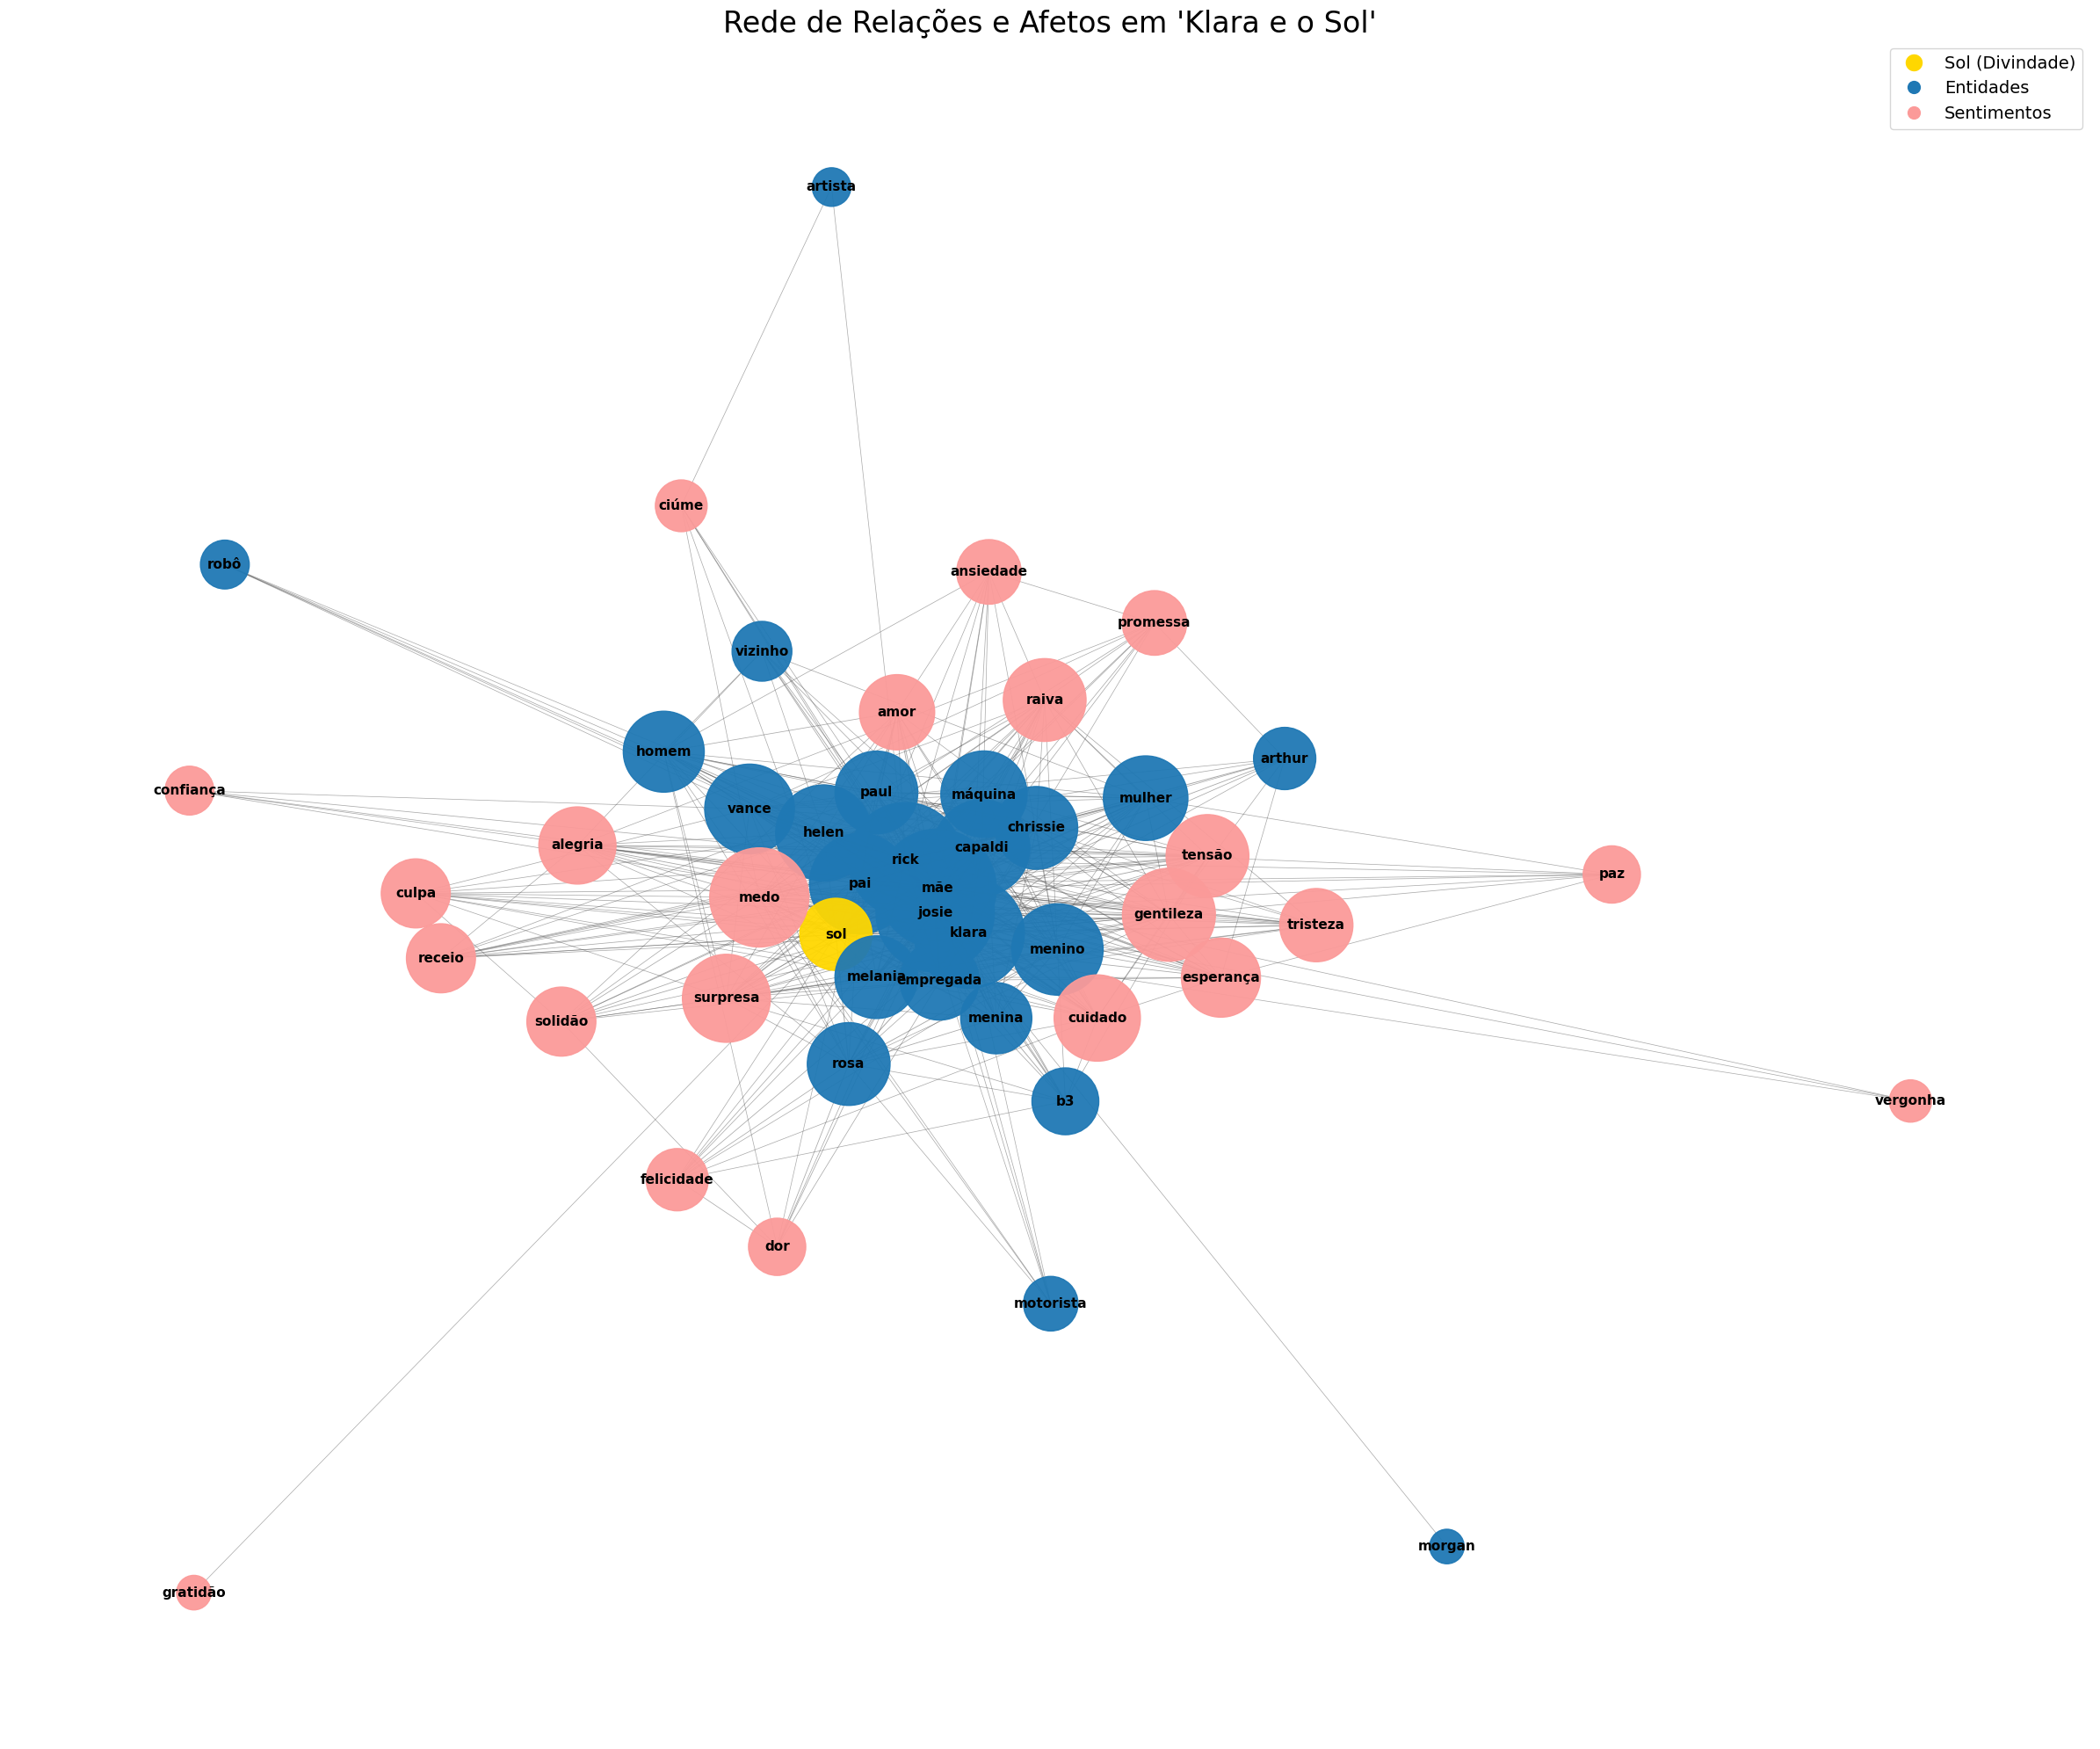

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter
import itertools
from matplotlib.lines import Line2D

# ==============================================================================
# 1. CONFIGURAÇÃO (Listas de Identidade)
# ==============================================================================

entidades = [
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', 'mulher', 'homem',
    'b3', 'máquina', 'robô', 'vizinho', 'artista', 'motorista', 'empregada'
]

sentimentos = [
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura', 'felicidade', 
    'promessa', 'cuidado', 'sacrifício'
]

todos_nos = entidades + sentimentos

# ==============================================================================
# 2. CARREGAMENTO DO ARQUIVO .TXT (ROBUSTO)
# ==============================================================================

def carregar_texto_txt(caminho_arquivo):
    print(f"Tentando ler: {caminho_arquivo}...")
    
    # TENTATIVA 1: UTF-8 (Padrão da Web/Linux)
    try:
        with open(caminho_arquivo, 'r', encoding='utf-8') as f:
            texto = f.read()
        print("-> Sucesso com codificação UTF-8.")
        return texto
    except UnicodeDecodeError:
        print("-> UTF-8 falhou. Tentando Latin-1...")
    except FileNotFoundError:
        print("-> ERRO: Arquivo não encontrado. Verifique se o nome está exato e se fez o upload.")
        return ""

    # TENTATIVA 2: Latin-1 (Comum no Windows)
    try:
        with open(caminho_arquivo, 'r', encoding='latin-1') as f:
            texto = f.read()
        print("-> Sucesso com codificação Latin-1.")
        return texto
    except Exception as e:
        print(f"-> Falha crítica ao ler arquivo: {e}")
        return ""

# --- AQUI ESTÁ A MUDANÇA DO NOME ---
nome_do_arquivo = 'Klara_Texto_Completo.txt'
texto_completo = carregar_texto_txt(nome_do_arquivo)

# Texto de emergência (caso o arquivo falhe, para o código não quebrar)
if not texto_completo:
    print("AVISO: Usando texto de emergência (CURTO) para teste.")
    texto_completo = """
    Klara observava o Sol com esperança. Josie sentia medo e dor. 
    A mãe tinha culpa. Rick prometeu lealdade e amor.
    Capaldi era frio. Paul sentia ciúme. Rosa tinha ansiedade.
    """

# Limpeza
def limpar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto.lower())
    return texto.split()

tokens = limpar_texto(texto_completo)
print(f"--- Total de palavras processadas: {len(tokens)} ---")

# ==============================================================================
# 3. CONSTRUÇÃO DA REDE (Janela Ampliada)
# ==============================================================================

G = nx.Graph()
# Adiciona nós base
for e in entidades: G.add_node(e, grupo='entidade')
for s in sentimentos: G.add_node(s, grupo='sentimento')

# Janela de 50 palavras (ideal para parágrafos inteiros)
janela_rede = 50
arestas = []

# Otimização: Filtra apenas palavras úteis antes de varrer
tokens_filtrados = [t for t in tokens if t in todos_nos]

# Varredura no texto original (preservando distância real)
for i in range(len(tokens) - janela_rede):
    janela = tokens[i : i + janela_rede]
    # Pega apenas quem nos interessa nessa janela
    itens_na_janela = [w for w in janela if w in todos_nos]
    # Remove duplicatas locais (ex: se "amor" aparece 2x na frase, conta 1x)
    itens_unicos = list(set(itens_na_janela))
    
    if len(itens_unicos) > 1:
        for par in itertools.combinations(itens_unicos, 2):
            arestas.append(tuple(sorted(par)))

# Pesos
contagem = Counter(arestas)
for (u, v), peso in contagem.items():
    G.add_edge(u, v, weight=peso)

# Limpeza de isolados
G.remove_nodes_from(list(nx.isolates(G)))

print(f"Nós no grafo final: {len(G.nodes())}")

# ==============================================================================
# 4. VISUALIZAÇÃO ESPAÇADA (MAX CLARITY)
# ==============================================================================

plt.figure(figsize=(24, 20)) 

# Layout de Repulsão Alta (Espalha bem as bolinhas)
pos = nx.spring_layout(G, k=14.0, iterations=300, seed=42)

cores_nos = []
tamanhos_nos = []

for node in G.nodes():
    if node == 'sol':
        cores_nos.append('#FFD700') # Dourado
        tamanhos_nos.append(3500)   # Sol Gigante
    elif node in entidades:
        cores_nos.append('#1f78b4') # Azul
        # Tamanho dinâmico: Mínimo 600, aumenta com conexões
        tamanhos_nos.append(G.degree(node) * 200 + 600)
    elif node in sentimentos:
        cores_nos.append('#fb9a99') # Vermelho
        tamanhos_nos.append(G.degree(node) * 200 + 600)
    else:
        cores_nos.append('grey')
        tamanhos_nos.append(300)

# Desenha Nós
nx.draw_networkx_nodes(G, pos, node_color=cores_nos, node_size=tamanhos_nos, alpha=0.95)

# Desenha Arestas (Linhas)
pesos = [G[u][v]['weight'] for u,v in G.edges()]
if pesos:
    # Normalização para a linha não ficar grossa demais nem sumir
    larguras = [(p / max(pesos) * 5) + 0.5 for p in pesos]
else:
    larguras = []

nx.draw_networkx_edges(G, pos, width=larguras, edge_color='#555555', alpha=0.5)

# Rótulos (Nomes)
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold', font_family='sans-serif')

# Legenda Personalizada
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sol (Divindade)', markerfacecolor='#FFD700', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Entidades', markerfacecolor='#1f78b4', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='Sentimentos', markerfacecolor='#fb9a99', markersize=12)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=14)

plt.title("Rede de Relações e Afetos em 'Klara e o Sol'", fontsize=24)
plt.axis('off')
plt.tight_layout()
plt.show()

Sucesso: Arquivo lido em UTF-8.
Grafo gerado com 48 nós.


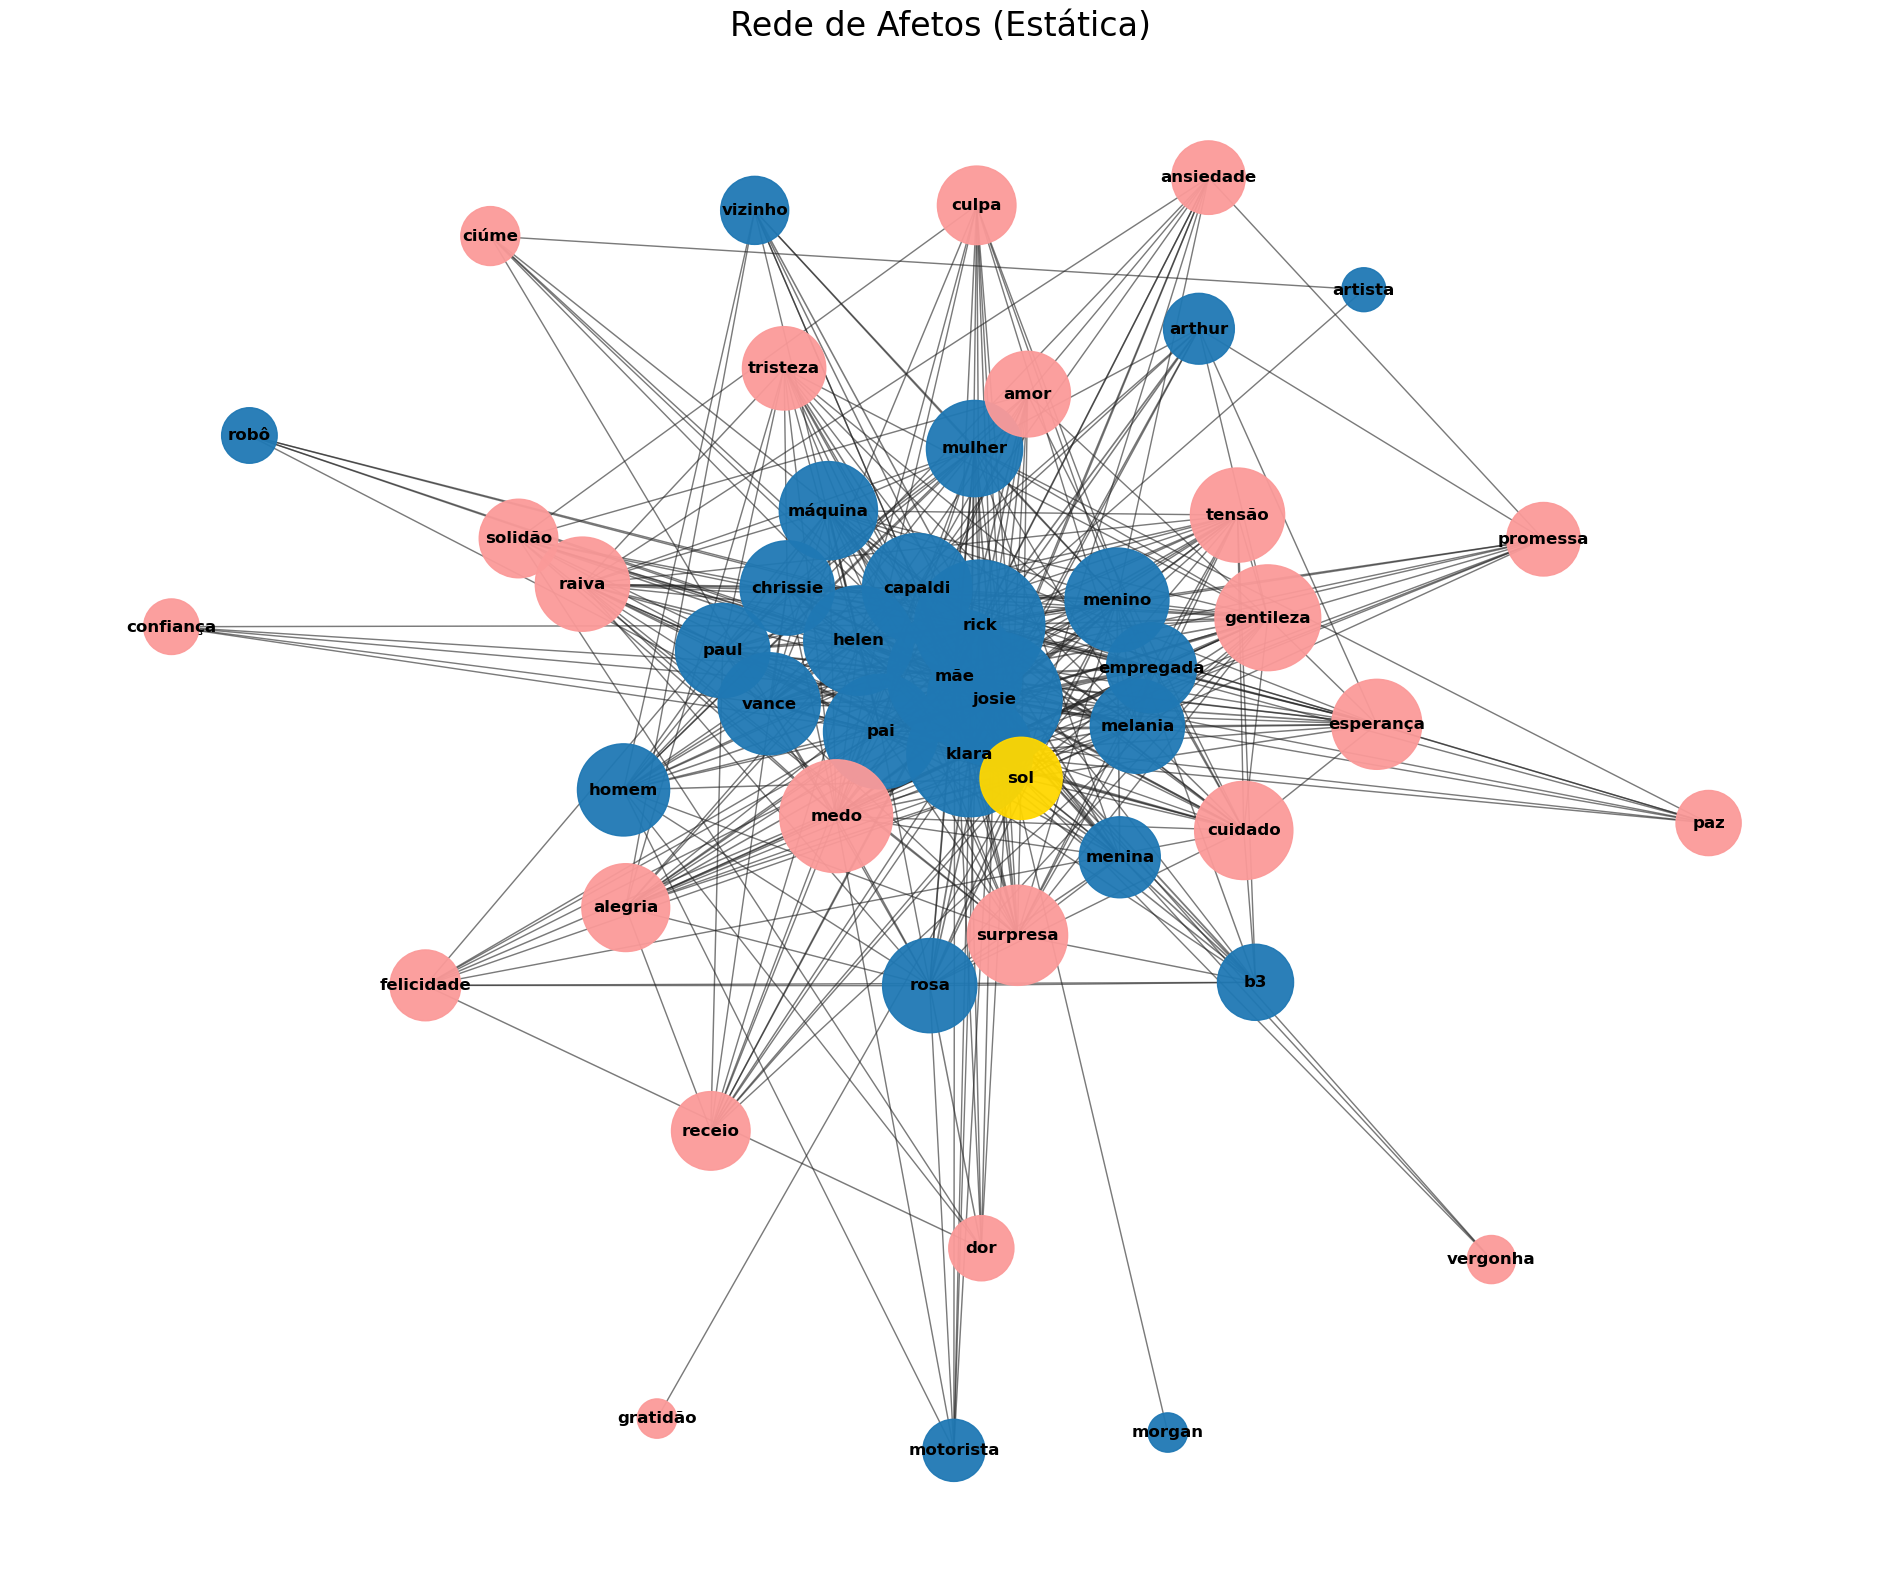

grafo_klara_interativo.html

--- ARQUIVO INTERATIVO GERADO: grafo_klara_interativo.html ---
Se estiver no Colab, verifique a pasta de arquivos à esquerda.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter
import itertools
from matplotlib.lines import Line2D
from pyvis.network import Network
import os

# ==============================================================================
# 1. CONFIGURAÇÃO E LEITURA
# ==============================================================================

entidades = [
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', 'mulher', 'homem',
    'b3', 'máquina', 'robô', 'vizinho', 'artista', 'motorista', 'empregada'
]

sentimentos = [
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura', 'felicidade', 
    'promessa', 'cuidado', 'sacrifício'
]

todos_nos = entidades + sentimentos

# Carregamento do Arquivo
nome_do_arquivo = 'Klara_Texto_Completo.txt'
texto_completo = ""

try:
    with open(nome_do_arquivo, 'r', encoding='utf-8') as f:
        texto_completo = f.read()
    print("Sucesso: Arquivo lido em UTF-8.")
except UnicodeDecodeError:
    try:
        with open(nome_do_arquivo, 'r', encoding='latin-1') as f:
            texto_completo = f.read()
        print("Sucesso: Arquivo lido em Latin-1.")
    except:
        print("ERRO: Não foi possível ler o arquivo. Usando texto de emergência.")

if not texto_completo:
    texto_completo = """
    Klara sentiu esperança no Sol. Josie tinha medo. A mãe sentia culpa.
    Rick prometeu amor. Capaldi era frio e causava medo. Paul sentia ciúme.
    """

def limpar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto.lower())
    return texto.split()

tokens = limpar_texto(texto_completo)

# ==============================================================================
# 2. CONSTRUÇÃO DO GRAFO
# ==============================================================================

G = nx.Graph()
# Adiciona nós para garantir existência
for e in entidades: G.add_node(e, group='entidade', title='Entidade')
for s in sentimentos: G.add_node(s, group='sentimento', title='Sentimento')

janela_rede = 50
arestas = []

# Filtra tokens úteis para agilizar
tokens_filtrados = [t for t in tokens if t in todos_nos]

for i in range(len(tokens) - janela_rede):
    janela = tokens[i : i + janela_rede]
    itens_unicos = list(set([w for w in janela if w in todos_nos]))
    
    if len(itens_unicos) > 1:
        for par in itertools.combinations(itens_unicos, 2):
            arestas.append(tuple(sorted(par)))

contagem = Counter(arestas)
for (u, v), peso in contagem.items():
    G.add_edge(u, v, weight=peso, title=f"Conexões: {peso}") # Title aparece no mouseover

G.remove_nodes_from(list(nx.isolates(G)))

print(f"Grafo gerado com {len(G.nodes())} nós.")

# ==============================================================================
# 3. VISUALIZAÇÃO ESTÁTICA (MATPLOTLIB - CORRIGIDA)
# ==============================================================================
# AQUI: Aumentei a repulsão (k=20) e escureci as linhas

plt.figure(figsize=(24, 20)) 
# k=20 é MUITA força de repulsão, vai jogar os nós longe um do outro
pos = nx.spring_layout(G, k=20.0, iterations=200, seed=42) 

cores_nos = []
tamanhos_nos = []

for node in G.nodes():
    if node == 'sol':
        cores_nos.append('#FFD700')
        tamanhos_nos.append(3500)
    elif node in entidades:
        cores_nos.append('#1f78b4')
        tamanhos_nos.append(G.degree(node) * 200 + 600)
    elif node in sentimentos:
        cores_nos.append('#fb9a99')
        tamanhos_nos.append(G.degree(node) * 200 + 600)
    else:
        cores_nos.append('grey')
        tamanhos_nos.append(300)

nx.draw_networkx_nodes(G, pos, node_color=cores_nos, node_size=tamanhos_nos, alpha=0.95)

# CORREÇÃO DAS LINHAS: Cor preta transparente e mais grossas
pesos = [G[u][v]['weight'] for u,v in G.edges()]
larguras = [(p / max(pesos) * 6) + 1.0 for p in pesos] if pesos else [] # Mínimo 1.0 de espessura

nx.draw_networkx_edges(G, pos, width=larguras, edge_color='#222222', alpha=0.6) # Cinza quase preto
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_family='sans-serif')

plt.title("Rede de Afetos (Estática)", fontsize=24)
plt.axis('off')
plt.show()

# ==============================================================================
# 4. VISUALIZAÇÃO INTERATIVA (HTML / PYVIS) - O PULO DO GATO
# ==============================================================================

# Cria a rede interativa
net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black")

# Configura as cores e tamanhos PARA O HTML (Pyvis usa atributos próprios)
for node in G.nodes():
    color = 'grey'
    size = 10
    
    if node == 'sol':
        color = '#FFD700'
        size = 50
    elif node in entidades:
        color = '#1f78b4'
        size = 20 + (G.degree(node) * 2)
    elif node in sentimentos:
        color = '#fb9a99'
        size = 20 + (G.degree(node) * 2)
        
    net.add_node(node, label=node, title=node, color=color, size=size)

# Adiciona as arestas
for u, v, data in G.edges(data=True):
    # value define a grossura da linha no HTML
    net.add_edge(u, v, value=data['weight'], title=f"Força: {data['weight']}")

# Configurações de Física (Isso faz elas se afastarem sozinhas)
net.show_buttons(filter_=['physics']) # Adiciona controle de física na tela

# Salva o arquivo
nome_html = "grafo_klara_interativo.html"
net.show(nome_html)

print(f"\n--- ARQUIVO INTERATIVO GERADO: {nome_html} ---")
print("Se estiver no Colab, verifique a pasta de arquivos à esquerda.")

In [2]:
pip install pandas networkx matplotlib pyvis

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import networkx as nx
import re
from collections import Counter
import itertools
from pyvis.network import Network
import os

# ==============================================================================
# 1. CONFIGURAÇÃO E LEITURA (Mesma base robusta)
# ==============================================================================

entidades = [
    'klara', 'josie', 'rick', 'mãe', 'pai', 'sol',
    'melania', 'rosa', 'gestora', 'chrissie', 'paul', 'helen', 
    'vance', 'arthur', 'capaldi', 'morgan', 'menina', 'menino', 'mulher', 'homem',
    'b3', 'máquina', 'robô', 'vizinho', 'artista', 'motorista', 'empregada'
]

sentimentos = [
    'amor', 'tristeza', 'alegria', 'raiva', 'medo', 'ódio',
    'lealdade', 'esperança', 'solidão', 'ciúme', 'culpa', 
    'vergonha', 'orgulho', 'desprezo', 'confiança',
    'ansiedade', 'dor', 'receio', 'gentileza', 'gratidão',
    'surpresa', 'tensão', 'paz', 'cura', 'felicidade', 
    'promessa', 'cuidado', 'sacrifício'
]

todos_nos = entidades + sentimentos

# Carregar Arquivo
nome_arquivo = 'Klara_Texto_Completo.txt'
texto_completo = ""

if os.path.exists(nome_arquivo):
    try:
        with open(nome_arquivo, 'r', encoding='utf-8') as f: texto_completo = f.read()
    except:
        with open(nome_arquivo, 'r', encoding='latin-1') as f: texto_completo = f.read()
else:
    print("AVISO: Usando texto de exemplo pois o arquivo não foi encontrado.")
    texto_completo = """
    Klara ama o Sol. Josie tem medo e culpa. A mãe sente tristeza e esperança.
    Rick promete lealdade. Capaldi traz medo e frieza.
    """

def limpar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto.lower())
    return texto.split()

tokens = limpar_texto(texto_completo)

# ==============================================================================
# 2. CONSTRUÇÃO DO GRAFO
# ==============================================================================

G = nx.Graph()

for e in entidades: G.add_node(e, group='entidade', title='Entidade')
for s in sentimentos: G.add_node(s, group='sentimento', title='Sentimento')

janela_rede = 50
arestas = []
tokens_filtrados = [t for t in tokens if t in todos_nos]

for i in range(len(tokens) - janela_rede):
    janela = tokens[i : i + janela_rede]
    itens_unicos = list(set([w for w in janela if w in todos_nos]))
    if len(itens_unicos) > 1:
        for par in itertools.combinations(itens_unicos, 2):
            arestas.append(tuple(sorted(par)))

contagem = Counter(arestas)
for (u, v), peso in contagem.items():
    G.add_edge(u, v, weight=peso, title=f"Força: {peso}")

G.remove_nodes_from(list(nx.isolates(G)))

# ==============================================================================
# 3. GERAÇÃO DO HTML BÁSICO
# ==============================================================================

net = Network(height="800px", width="100%", bgcolor="#ffffff", font_color="black", cdn_resources='remote')

# Configuração Visual
for node in G.nodes():
    if node == 'sol':
        net.add_node(node, label=node, title=node, color='#FFD700', size=50)
    elif node in entidades:
        net.add_node(node, label=node, title=node, color='#1f78b4', size=20 + (G.degree(node)*2))
    elif node in sentimentos:
        net.add_node(node, label=node, title=node, color='#fb9a99', size=20 + (G.degree(node)*2))

for u, v, data in G.edges(data=True):
    net.add_edge(u, v, value=data['weight'], color='#444444')

# Configuração de Física (Estável)
net.barnes_hut(gravity=-30000, central_gravity=0.3, spring_length=200)

# Salva o arquivo temporário
nome_html = "grafo_com_lista_lateral.html"
net.save_graph(nome_html)

# ==============================================================================
# 4. INJEÇÃO DE CÓDIGO (O PULO DO GATO - PAINEL LATERAL)
# ==============================================================================
# Aqui vamos abrir o HTML gerado e escrever um script de painel lateral dentro dele.

custom_code = """
<style>
    /* Estilo do Painel Lateral */
    #info-panel {
        position: fixed;
        top: 20px;
        right: 20px;
        width: 300px;
        max-height: 80%;
        background-color: rgba(255, 255, 255, 0.95);
        border: 1px solid #ccc;
        box-shadow: 0 0 10px rgba(0,0,0,0.2);
        padding: 15px;
        border-radius: 8px;
        overflow-y: auto;
        font-family: Arial, sans-serif;
        display: none; /* Começa escondido */
        z-index: 9999;
    }
    #info-header {
        font-size: 18px;
        font-weight: bold;
        margin-bottom: 10px;
        color: #333;
        border-bottom: 2px solid #1f78b4;
        padding-bottom: 5px;
    }
    .connection-item {
        padding: 5px 0;
        border-bottom: 1px solid #eee;
        font-size: 14px;
    }
    .badge {
        display: inline-block;
        padding: 2px 6px;
        font-size: 11px;
        border-radius: 4px;
        color: white;
        margin-right: 5px;
    }
    .badge-entidade { background-color: #1f78b4; }
    .badge-sentimento { background-color: #fb9a99; }
    .badge-sol { background-color: #FFD700; color: black; }
</style>

<div id="info-panel">
    <div id="info-header">Detalhes</div>
    <div id="info-content">Clique em um nó...</div>
</div>

<script type="text/javascript">
    // Espera a rede carregar
    network.on("click", function (params) {
        var panel = document.getElementById("info-panel");
        var header = document.getElementById("info-header");
        var content = document.getElementById("info-content");

        if (params.nodes.length > 0) {
            // Pegou o nó clicado
            var nodeId = params.nodes[0];
            var connectedEdges = network.getConnectedEdges(nodeId);
            var connectedNodes = network.getConnectedNodes(nodeId);
            
            // Mostra o painel
            panel.style.display = "block";
            header.innerText = "Análise: " + nodeId.toUpperCase();
            
            // Monta a lista de conexões
            var htmlList = "";
            
            // Cria um array de objetos para ordenar
            var connections = [];
            
            connectedNodes.forEach(function(neighborId) {
                // Tenta achar o peso da aresta (gambiarra visual pois pyvis esconde os dados brutos)
                // Vamos apenas listar os vizinhos
                var typeClass = "badge-entidade"; // Default
                // Tenta adivinhar o tipo pela cor (hack simples) ou lista fixa se tivessemos acesso
                
                connections.push({id: neighborId});
            });

            // Se não tiver conexões
            if (connections.length === 0) {
                htmlList = "Nenhuma conexão.";
            } else {
                htmlList += "<strong>Conectado com (" + connections.length + "):</strong><br>";
                connections.forEach(function(conn) {
                    htmlList += "<div class='connection-item'> ➤ " + conn.id + "</div>";
                });
            }
            
            content.innerHTML = htmlList;
        } else {
            // Clicou no vazio, esconde o painel
            panel.style.display = "none";
        }
    });
</script>
"""

# Lê o arquivo HTML gerado
with open(nome_html, "r", encoding='utf-8') as f:
    html_content = f.read()

# Insere o código customizado antes do fim do body
final_html = html_content.replace("</body>", custom_code + "</body>")

# Salva o arquivo final
with open(nome_html, "w", encoding='utf-8') as f:
    f.write(final_html)

print(f"\nSUCESSO! Arquivo gerado: {nome_html}")
print("Abra no navegador. Agora, ao clicar numa bolinha, veja a lista aparecer no canto direito!")

try:
    import webbrowser
    webbrowser.open(nome_html)
except:
    pass


SUCESSO! Arquivo gerado: grafo_com_lista_lateral.html
Abra no navegador. Agora, ao clicar numa bolinha, veja a lista aparecer no canto direito!
